In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Analysis

In [2]:
df = pd.read_csv('data_full_outer.csv')
df.head()

,id_x,user_id,product_id,gross_amount,discounts,transaction_date,id_y,product name,id,full_name,...,wallet_balance,join_date,birth,location_id,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,TRX443072,SC3526052001006,1.0,519700.0,NaN,2024-05-19,1.0,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,...,750000.0,2023-12-08,1996-01-26,352605,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
1,TRX443073,SC3526052001006,1.0,185000.0,NaN,2024-01-06,1.0,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,...,750000.0,2023-12-08,1996-01-26,352605,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
2,TRX443074,SC3526052001006,1.0,488400.0,248200.0,2024-02-03,1.0,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,...,750000.0,2023-12-08,1996-01-26,352605,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
3,TRX443075,SC3526052001006,1.0,706900.0,551800.0,2024-07-01,1.0,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,...,750000.0,2023-12-08,1996-01-26,352605,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
4,TRX443076,SC3526052001006,14.0,128500.0,NaN,2024-11-04,14.0,Kesehatan,SC3526052001006,Ir. SENJAYAWATI S.Sos.,...,750000.0,2023-12-08,1996-01-26,352605,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605


In [3]:
df.columns

Index(['id_x', 'user_id', 'product_id', 'gross_amount', 'discounts',
       'transaction_date', 'id_y', 'product name', 'id', 'full_name', 'gender',
       'money_spent', 'refund', 'wallet_balance', 'join_date', 'birth',
       'location_id', 'nama provinsi', 'kode provinsi', 'nama kabupaten',
       'kode kabupaten', 'nama kecamatan', 'kode kecamatan'],
      dtype='object')

In [4]:
df = df.drop(['id_x'], axis=1)
df = df.drop(['id_y'], axis=1)
df = df.drop(['user_id'], axis=1)
df = df.drop(['location_id'], axis=1)
df.head()

,product_id,gross_amount,discounts,transaction_date,product name,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,1.0,519700.0,NaN,2024-05-19,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
1,1.0,185000.0,NaN,2024-01-06,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
2,1.0,488400.0,248200.0,2024-02-03,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
3,1.0,706900.0,551800.0,2024-07-01,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
4,14.0,128500.0,NaN,2024-11-04,Kesehatan,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605


In [5]:
df.rename(columns={'id': 'user_id'}, inplace=True)

In [6]:
df.isna().sum()

product_id             6927
gross_amount          22814
discounts           1874560
transaction_date       6927
product name           6927
user_id                   0
full_name                 0
gender                    0
money_spent               0
refund                    0
wallet_balance            0
join_date                 0
birth                     0
nama provinsi             0
kode provinsi             0
nama kabupaten            0
kode kabupaten            0
nama kecamatan            0
kode kecamatan            0
dtype: int64

In [7]:
df[['gross_amount', 'discounts']] = df[['gross_amount', 'discounts']].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709927 entries, 0 to 2709926
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   product_id        float64
 1   gross_amount      float64
 2   discounts         float64
 3   transaction_date  object 
 4   product name      object 
 5   user_id           object 
 6   full_name         object 
 7   gender            object 
 8   money_spent       float64
 9   refund            float64
 10  wallet_balance    float64
 11  join_date         object 
 12  birth             object 
 13  nama provinsi     object 
 14  kode provinsi     int64  
 15  nama kabupaten    object 
 16  kode kabupaten    int64  
 17  nama kecamatan    object 
 18  kode kecamatan    int64  
dtypes: float64(6), int64(3), object(10)
memory usage: 392.8+ MB


In [9]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [10]:
df['transaction_date'].min(), df['transaction_date'].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

data transaksi tercatat selama 1 tahun, yaitu tahun 2024 di empat provinsi

In [11]:
df.isna().sum()

product_id          6927
gross_amount           0
discounts              0
transaction_date    6927
product name        6927
user_id                0
full_name              0
gender                 0
money_spent            0
refund                 0
wallet_balance         0
join_date              0
birth                  0
nama provinsi          0
kode provinsi          0
nama kabupaten         0
kode kabupaten         0
nama kecamatan         0
kode kecamatan         0
dtype: int64

Didapatkan bahwa ada 6927 user tidak tercatat dalam transaksi. terdapat dua kemungkinan yang terjadi, yaitu :
- user melakukan transaksi sebelum tahun 2024
- user memang belum melakkukan transaksi.

In [12]:
df[df['gross_amount'] == 0]

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
7,1.0,0.0,0.0,2024-07-29,Man Fashion,SC3526052007004,HASANI,laki-laki,2230000.0,20000.0,110000.0,2023-11-23,1998-08-13,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
8,1.0,0.0,0.0,2024-07-02,Man Fashion,SC3526052007004,HASANI,laki-laki,2230000.0,20000.0,110000.0,2023-11-23,1998-08-13,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
9,14.0,0.0,0.0,2024-04-23,Kesehatan,SC3526052007004,HASANI,laki-laki,2230000.0,20000.0,110000.0,2023-11-23,1998-08-13,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
10,14.0,0.0,0.0,2024-08-29,Kesehatan,SC3526052007004,HASANI,laki-laki,2230000.0,20000.0,110000.0,2023-11-23,1998-08-13,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
11,14.0,0.0,0.0,2024-02-08,Kesehatan,SC3526052007004,HASANI,laki-laki,2230000.0,20000.0,110000.0,2023-11-23,1998-08-13,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709922,NaN,0.0,0.0,NaT,NaN,SC3504011006019,RACHMAN ANITA,perempuan,370000.0,310000.0,2200000.0,2023-12-25,1979-05-18,JAWA TIMUR,35,TULUNGAGUNG,3504,TULUNGAGUNG,350401
2709923,NaN,0.0,0.0,NaT,NaN,SC3504011006022,AMIN,perempuan,1820000.0,270000.0,740000.0,2023-12-02,2007-10-17,JAWA TIMUR,35,TULUNGAGUNG,3504,TULUNGAGUNG,350401
2709924,NaN,0.0,0.0,NaT,NaN,SC3504011009004,Artha DHAMAYANTI,perempuan,1840000.0,230000.0,540000.0,2023-10-04,1979-05-22,JAWA TIMUR,35,TULUNGAGUNG,3504,TULUNGAGUNG,350401
2709925,NaN,0.0,0.0,NaT,NaN,SC3504011009009,RISMAYANTI,perempuan,2180000.0,170000.0,590000.0,2023-11-08,1998-05-20,JAWA TIMUR,35,TULUNGAGUNG,3504,TULUNGAGUNG,350401


## EDA selanjutnya akan difokuskan pada transaksi yang terjadi pada tahun 2024 agar tidak mengganggu jalannya analisis dan modelling

In [13]:
df_clean = df.dropna(subset=['transaction_date'])
df_clean.shape

(2703000, 19)

In [14]:
df_clean.head()

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,1.0,519700.0,0.0,2024-05-19,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
1,1.0,185000.0,0.0,2024-01-06,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
2,1.0,488400.0,248200.0,2024-02-03,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
3,1.0,706900.0,551800.0,2024-07-01,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
4,14.0,128500.0,0.0,2024-11-04,Kesehatan,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605


#### Analisis Nilai Aneh

In [15]:
# Mengurutkan DataFrame berdasarkan kolom 'user_id'
df_sorted = df_clean.sort_values(by='user_id')
df_sorted.head()

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
1560930,14.0,82500.0,0.0,2024-05-04,Kesehatan,SC3501012001001,ANAK,perempuan,1630000.0,220000.0,860000.0,2023-10-09,1993-05-07,JAWA TIMUR,35,PACITAN,3501,DONOROJO,350101
1560952,8.0,7300.0,7300.0,2024-08-10,Elektronik,SC3501012001001,ANAK,perempuan,1630000.0,220000.0,860000.0,2023-10-09,1993-05-07,JAWA TIMUR,35,PACITAN,3501,DONOROJO,350101
1560951,8.0,11500.0,0.0,2024-11-15,Elektronik,SC3501012001001,ANAK,perempuan,1630000.0,220000.0,860000.0,2023-10-09,1993-05-07,JAWA TIMUR,35,PACITAN,3501,DONOROJO,350101
1560950,8.0,11200.0,0.0,2024-04-18,Elektronik,SC3501012001001,ANAK,perempuan,1630000.0,220000.0,860000.0,2023-10-09,1993-05-07,JAWA TIMUR,35,PACITAN,3501,DONOROJO,350101
1560949,6.0,8000.0,4000.0,2024-08-08,Travel,SC3501012001001,ANAK,perempuan,1630000.0,220000.0,860000.0,2023-10-09,1993-05-07,JAWA TIMUR,35,PACITAN,3501,DONOROJO,350101


In [16]:
df_clean['wallet_balance'].groupby(df_clean['user_id']).sum().sum()

1783705990000.0

In [17]:
df_clean['wallet_balance'].min()

-6469999.999999999

In [18]:
df_clean[df_clean['wallet_balance']<0].count()

product_id          18168
gross_amount        18168
discounts           18168
transaction_date    18168
product name        18168
user_id             18168
full_name           18168
gender              18168
money_spent         18168
refund              18168
wallet_balance      18168
join_date           18168
birth               18168
nama provinsi       18168
kode provinsi       18168
nama kabupaten      18168
kode kabupaten      18168
nama kecamatan      18168
kode kecamatan      18168
dtype: int64

In [19]:
df_clean[df_clean['money_spent']<0].count()

product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
user_id             0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
kode kecamatan      0
dtype: int64

In [20]:
df_clean[df_clean['refund']<0].count()

product_id          4934
gross_amount        4934
discounts           4934
transaction_date    4934
product name        4934
user_id             4934
full_name           4934
gender              4934
money_spent         4934
refund              4934
wallet_balance      4934
join_date           4934
birth               4934
nama provinsi       4934
kode provinsi       4934
nama kabupaten      4934
kode kabupaten      4934
nama kecamatan      4934
kode kecamatan      4934
dtype: int64

In [21]:
df_clean[(df_clean['refund']<0) & (df_clean['wallet_balance']>0)].count()

product_id          4258
gross_amount        4258
discounts           4258
transaction_date    4258
product name        4258
user_id             4258
full_name           4258
gender              4258
money_spent         4258
refund              4258
wallet_balance      4258
join_date           4258
birth               4258
nama provinsi       4258
kode provinsi       4258
nama kabupaten      4258
kode kabupaten      4258
nama kecamatan      4258
kode kecamatan      4258
dtype: int64

In [22]:
df_clean[(df_clean['refund']<0) & (df_clean['wallet_balance']<0)].count()

product_id          608
gross_amount        608
discounts           608
transaction_date    608
product name        608
user_id             608
full_name           608
gender              608
money_spent         608
refund              608
wallet_balance      608
join_date           608
birth               608
nama provinsi       608
kode provinsi       608
nama kabupaten      608
kode kabupaten      608
nama kecamatan      608
kode kecamatan      608
dtype: int64

In [23]:
df_clean[(df_clean['refund']>0) & (df_clean['wallet_balance']<0)].count()

product_id          16804
gross_amount        16804
discounts           16804
transaction_date    16804
product name        16804
user_id             16804
full_name           16804
gender              16804
money_spent         16804
refund              16804
wallet_balance      16804
join_date           16804
birth               16804
nama provinsi       16804
kode provinsi       16804
nama kabupaten      16804
kode kabupaten      16804
nama kecamatan      16804
kode kecamatan      16804
dtype: int64

In [24]:
df_clean[df_clean['discounts']<0].count()

product_id          191
gross_amount        191
discounts           191
transaction_date    191
product name        191
user_id             191
full_name           191
gender              191
money_spent         191
refund              191
wallet_balance      191
join_date           191
birth               191
nama provinsi       191
kode provinsi       191
nama kabupaten      191
kode kabupaten      191
nama kecamatan      191
kode kecamatan      191
dtype: int64

In [25]:
df_clean[(df_clean['gross_amount']<0) & (df_clean['refund']>0)].loc[:, ['user_id', 'gross_amount', 'refund']]

,user_id,gross_amount,refund
12893,SC3510252004004,-8.673617e-14,110000.0
43732,SC3510142005006,-8.673617e-14,20000.0
60719,SC3510052006017,-8.673617e-14,430000.0
63618,SC3510052007007,-8.673617e-14,240000.0
68548,SC3510012004029,-8.673617e-14,200000.0
...,...,...,...
2668613,SC5107082001025,-8.673617e-14,50000.0
2676046,SC5171042005054,-8.673617e-14,120000.0
2682725,SC5202052002013,-8.673617e-14,70000.0
2687531,SC3505182008005,-8.673617e-14,60000.0


In [26]:
cek_gross_amount_refund = df_clean[(df_clean['gross_amount']<0) & (df_clean['refund']>0)].loc[:, ['user_id', 'gross_amount', 'refund']]
cek_gross_amount_refund['user_id'].duplicated().sum()

0

In [27]:
cek_gross_amount_refund['gross_amount'].value_counts()

-8.673617e-14    147
-1.000000e+02     14
-1.000000e+02     11
-1.562986e-11      8
-1.000000e+02      4
-4.440892e-12      2
-1.000000e+02      2
-1.776357e-11      1
Name: gross_amount, dtype: int64

In [28]:
cek_gross_amount_refund = df_clean[(df_clean['gross_amount']<0) & (df_clean['refund']>0)].loc[:, ['user_id', 'gross_amount', 'refund']]
cek_gross_amount_refund = cek_gross_amount_refund.groupby(['user_id']).agg({
    'gross_amount': 'sum',
    'refund': 'first',
}).reset_index()

cek_gross_amount_refund

,user_id,gross_amount,refund
0,SC3501012004004,-8.673617e-14,180000.0
1,SC3501032003013,-1.000000e+02,250000.0
2,SC3501041002009,-8.673617e-14,290000.0
3,SC3501082002015,-8.673617e-14,210000.0
4,SC3501102003013,-8.673617e-14,150000.0
...,...,...,...
184,SC5203202002011,-8.673617e-14,160000.0
185,SC5204242003005,-8.673617e-14,160000.0
186,SC5205052006001,-1.000000e+02,180000.0
187,SC5206182009001,-8.673617e-14,90000.0


In [29]:
df_clean[df_clean['money_spent']<0].count()

product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
user_id             0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
kode kecamatan      0
dtype: int64

terdapat fenomena aneh dimana nilai `refund` atau `wallet_balance` bernilai <b>negatif</b>. berikut rinciannya:
- total transaksi yang usernya memiliki nilai `wallet_balance` < 0 ada sebanyak `18168`
- total transaksi yang usernya memiliki nilai `refund` < 0 ada sebanyak `4934`
- total transaksi yang usernya memiliki nilai `wallet_balance` < 0 dan `refund` < 0 ada sebanyak `608`
- total transaksi yang usernya memiliki nilai `wallet_balance` < 0 tetapi `refund` > 0 ada sebanyak `16804`
- total transaksi yang usernya memiliki nilai `refund` < 0 tetapi `wallet_balance` > 0 ada sebanyak `4258`
- total transaksi yang memiliki nilai `gross_amount` < 0 <b>dan</b> `discounts` < 0 ada sebanyak `191`
- semua transaksi yang memiliki nilai `gross_amount` < 0 <b>selalu</b> memiliki nilai `discounts` < 0
- semua transaksi yang memiliki nilai `gross_amount` < 0 <b>tidak ada</b> yang memiliki nilai `refund` < 0


karena aneh, maka semua gross_amount, discount, wallet_balance, dan refund yang bernilai negatif akan dihapus

In [30]:
# menghapus data yang memiliki nilai negatif pada kolom 'gross_amount', 'discount', 'wallet_balance', 'refund', dan 'money_spent'
df_clean = df_clean[(df_clean['gross_amount'] >= 0) & (df_clean['discounts'] >= 0) & (df_clean['wallet_balance'] >= 0) & (df_clean['refund'] >= 0) & (df_clean['money_spent'] >= 0)]
df_clean.shape

(2680316, 19)

#### Univariate Analysis

In [31]:
df_clean

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,1.0,519700.0,0.0,2024-05-19,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
1,1.0,185000.0,0.0,2024-01-06,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
2,1.0,488400.0,248200.0,2024-02-03,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
3,1.0,706900.0,551800.0,2024-07-01,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
4,14.0,128500.0,0.0,2024-11-04,Kesehatan,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000.0,0.0,750000.0,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702995,16.0,1000.0,0.0,2024-01-11,Sewa Motor/Mobil,SC3578251002034,USWATUN UMMAMI,perempuan,0.0,0.0,0.0,2024-09-27,1997-05-12,JAWA TIMUR,35,KOTA SURABAYA,3578,GUNUNG ANYAR,357825
2702996,16.0,2100.0,0.0,2024-01-04,Sewa Motor/Mobil,SC3520142007921,EGA,laki-laki,0.0,0.0,2910000.0,2024-02-18,1982-12-05,JAWA TIMUR,35,MAGETAN,3520,KARAS,352014
2702997,16.0,7900.0,0.0,2024-10-05,Sewa Motor/Mobil,SC3520142007921,EGA,laki-laki,0.0,0.0,2910000.0,2024-02-18,1982-12-05,JAWA TIMUR,35,MAGETAN,3520,KARAS,352014
2702998,16.0,2900.0,0.0,2024-10-09,Sewa Motor/Mobil,SC3507162001003,NURRACHADIANA NAZIFAH,perempuan,0.0,0.0,0.0,2024-09-12,1996-06-24,JAWA TIMUR,35,MALANG,3507,TUMPANG,350716


In [32]:
pd.options.display.float_format = '{:.0f}'.format

# Lakukan operasi grup dan urutkan
df_clean['wallet_balance'].groupby(df_clean['user_id']).first().sort_values()

user_id
SC9212092020001            0
SC3527112006008            0
SC3527112006013            0
SC3527112006016            0
SC3527112012002            0
                     ...    
SC3507032010023      7810000
SC5202072010008      8210000
SC5202042001030     10060000
SC3578201004038     10830000
SC3525122021001   1280390000
Name: wallet_balance, Length: 82257, dtype: float64

In [33]:
df_clean[df_clean['user_id'] == "SC9212092020001"]

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
2701937,3,605300,0,2024-12-30,Food & Drink,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701938,3,688600,0,2024-03-19,Food & Drink,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701939,3,36100,0,2024-05-28,Food & Drink,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701940,4,10800,0,2024-09-11,Ride Hailing,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701941,4,533500,0,2024-02-21,Ride Hailing,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701942,4,490300,0,2024-10-26,Ride Hailing,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209
2701943,4,165400,0,2024-12-05,Ride Hailing,SC9212092020001,SAMBUAGA DJUMAD,laki-laki,2530000,0,0,2023-12-18,1998-04-17,PAPUA BARAT,92,PEGUNUNGAN ARFAK,9212,MINYAMBAOUW,921209


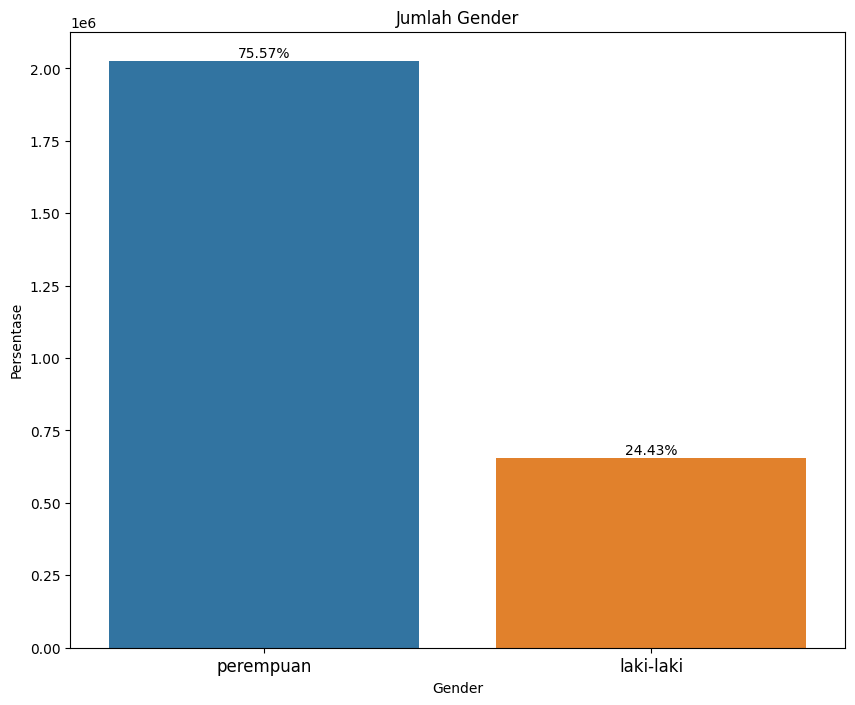

In [34]:
# Visualisasi jumlah kemunculan gender
# Hitung jumlah total data
total_data = len(df_clean)


# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_clean, x='gender')
plt.title('Jumlah Gender')
plt.xlabel('Gender')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 13000,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=12)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()



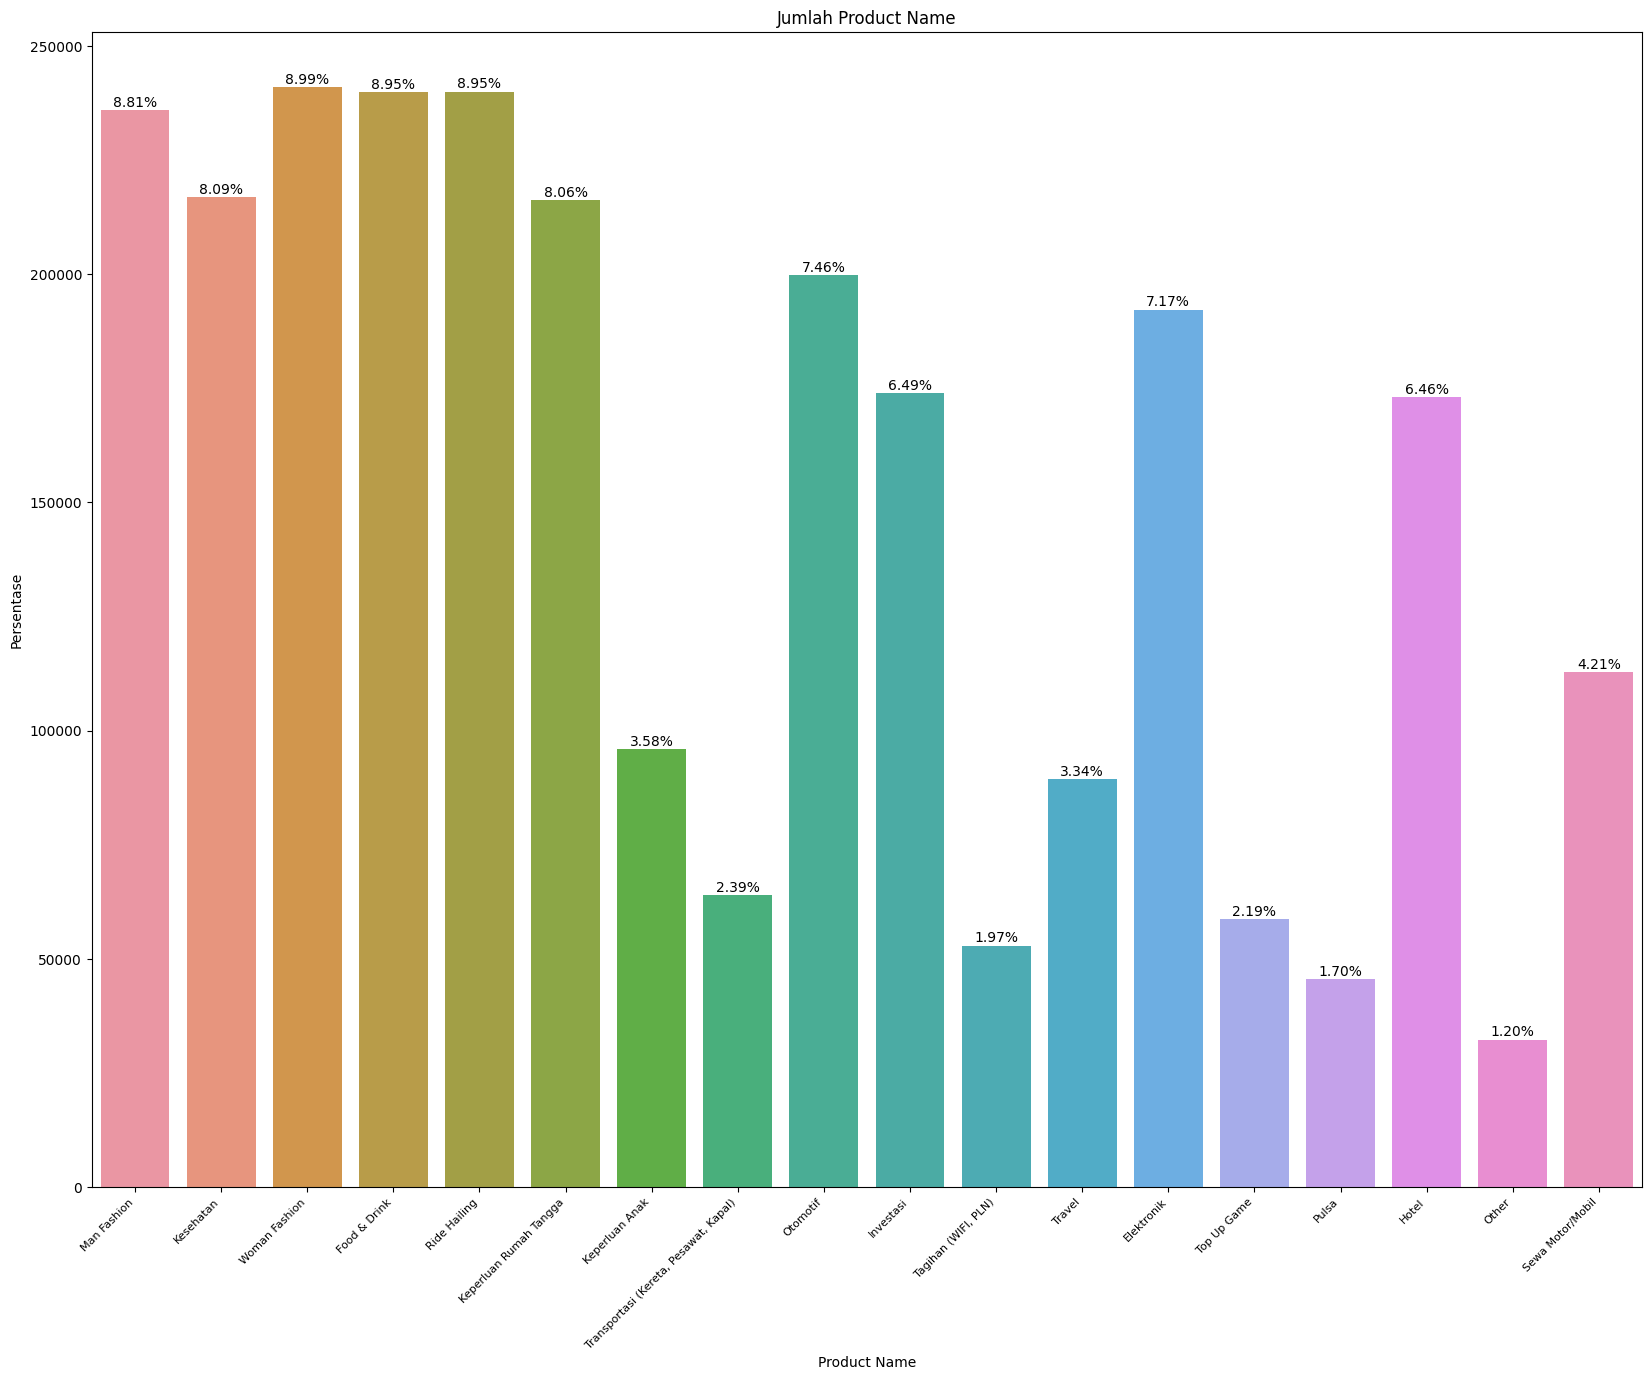

In [35]:
# Hitung jumlah total data
total_data = len(df_clean)

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(20, 15))
ax = sns.countplot(data=df_clean, x='product name')
plt.title('Jumlah Product Name')
plt.xlabel('Product Name')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 800,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=8)

# Mengatur label sumbu x agar dibungkus (wrap text)
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()



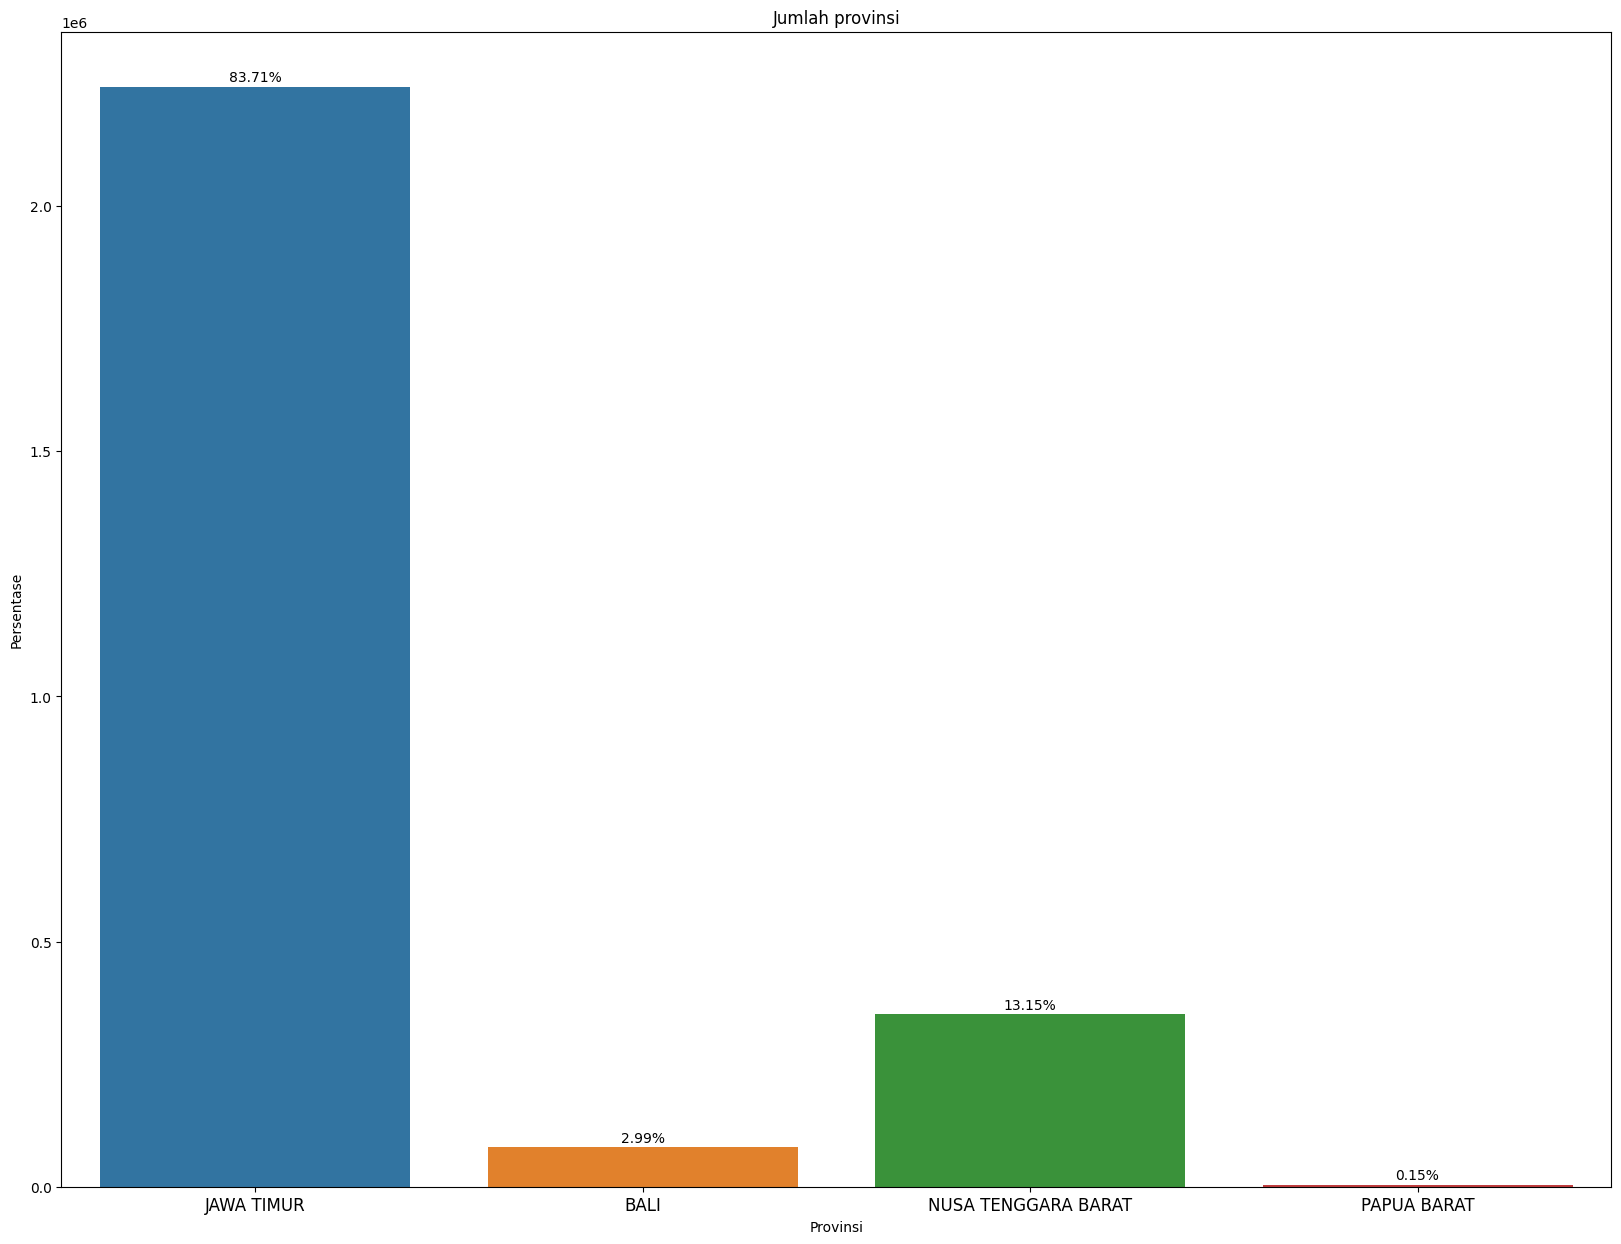

In [36]:

# Hitung jumlah total data
total_data = len(df_clean)

# Hitung jumlah kemunculan setiap kategori dan hitung persentasenya
# count_per_category = df_clean['nama provinsi'].value_counts()
# percentage_per_category = (count_per_category / total_data) * 100

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(20, 15))
ax = sns.countplot(data=df_clean, x='nama provinsi')
plt.title('Jumlah provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 10000,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=12)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()


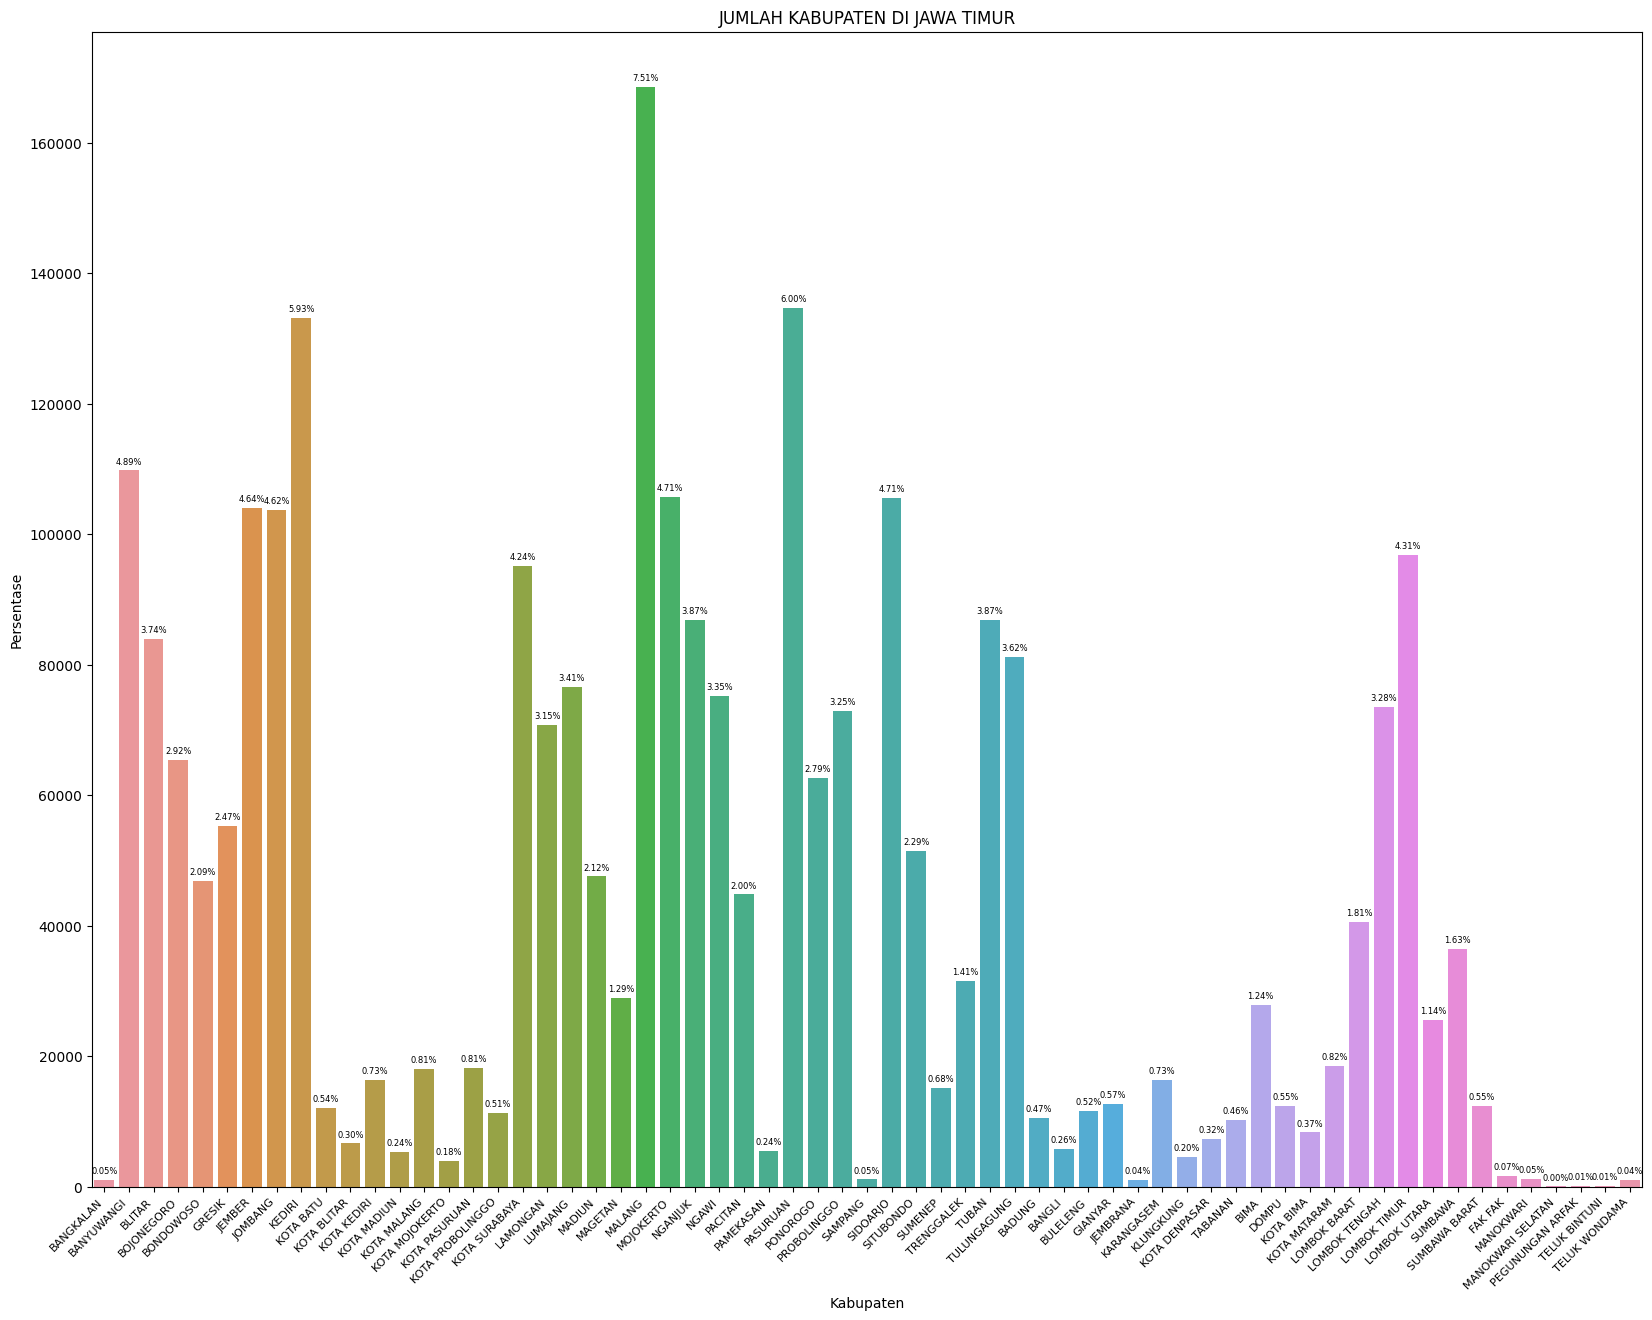

In [37]:
# Hitung jumlah total data
total_data = len(df_clean[df_clean['nama provinsi'] == 'JAWA TIMUR'])

# # Hitung jumlah kemunculan setiap kategori dan hitung persentasenya
# count_per_category = df_clean[df_clean['nama provinsi'] == 'JAWA TIMUR']['nama kabupaten'].value_counts()
# percentage_per_category = (count_per_category / total_data) * 100

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(20, 15))
ax = sns.countplot(data=df_clean, x='nama kabupaten')
plt.title('JUMLAH KABUPATEN DI JAWA TIMUR')
plt.xlabel('Kabupaten')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1000,
            s="{:.2f}%".format(height/total_data*100),
            ha='center', fontsize=6)

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=8)

# Mengatur label sumbu x agar dibungkus (wrap text)
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

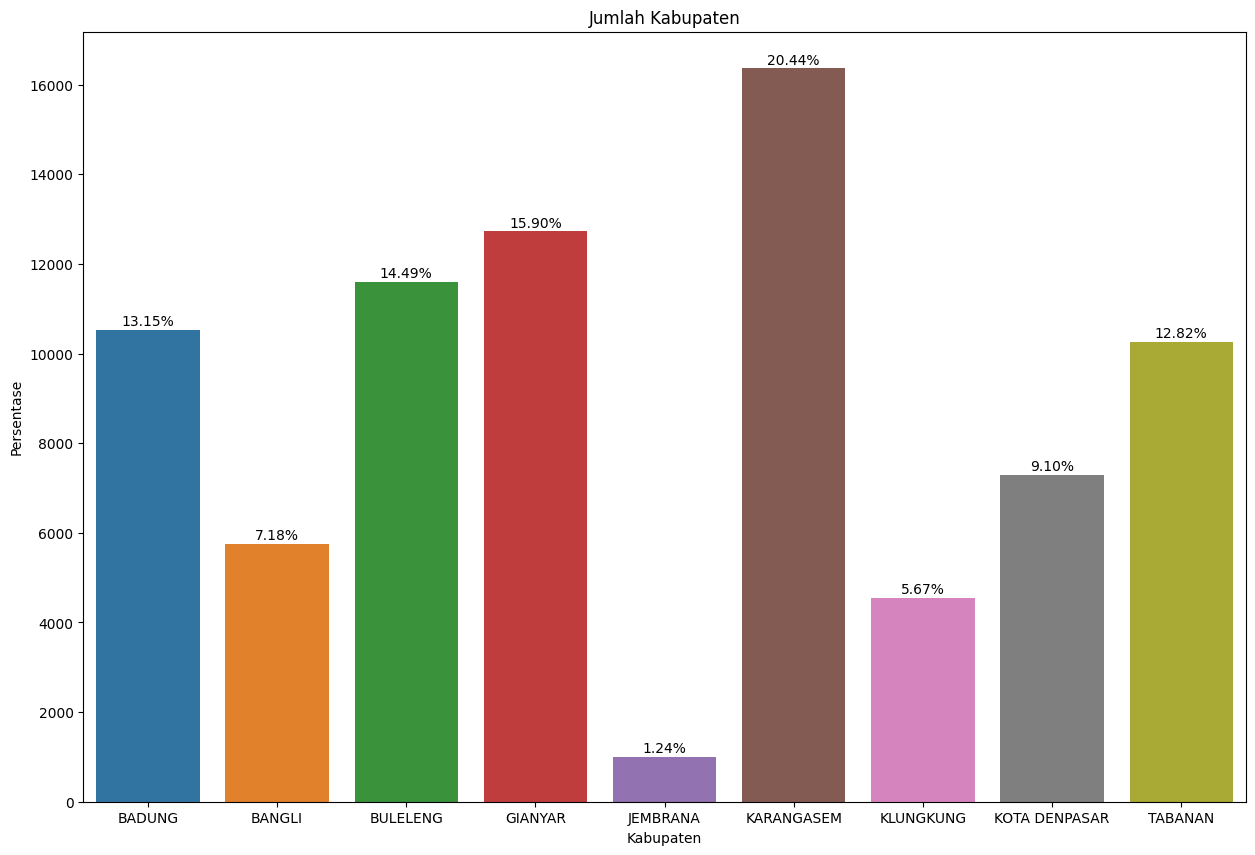

In [38]:
# Hitung jumlah total data
total_data = len(df_clean[df_clean['nama provinsi'] == 'BALI'])

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_clean[df_clean['nama provinsi'] == 'BALI'], x='nama kabupaten')
plt.title('Jumlah Kabupaten')
plt.xlabel('Kabupaten')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 100,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=10)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

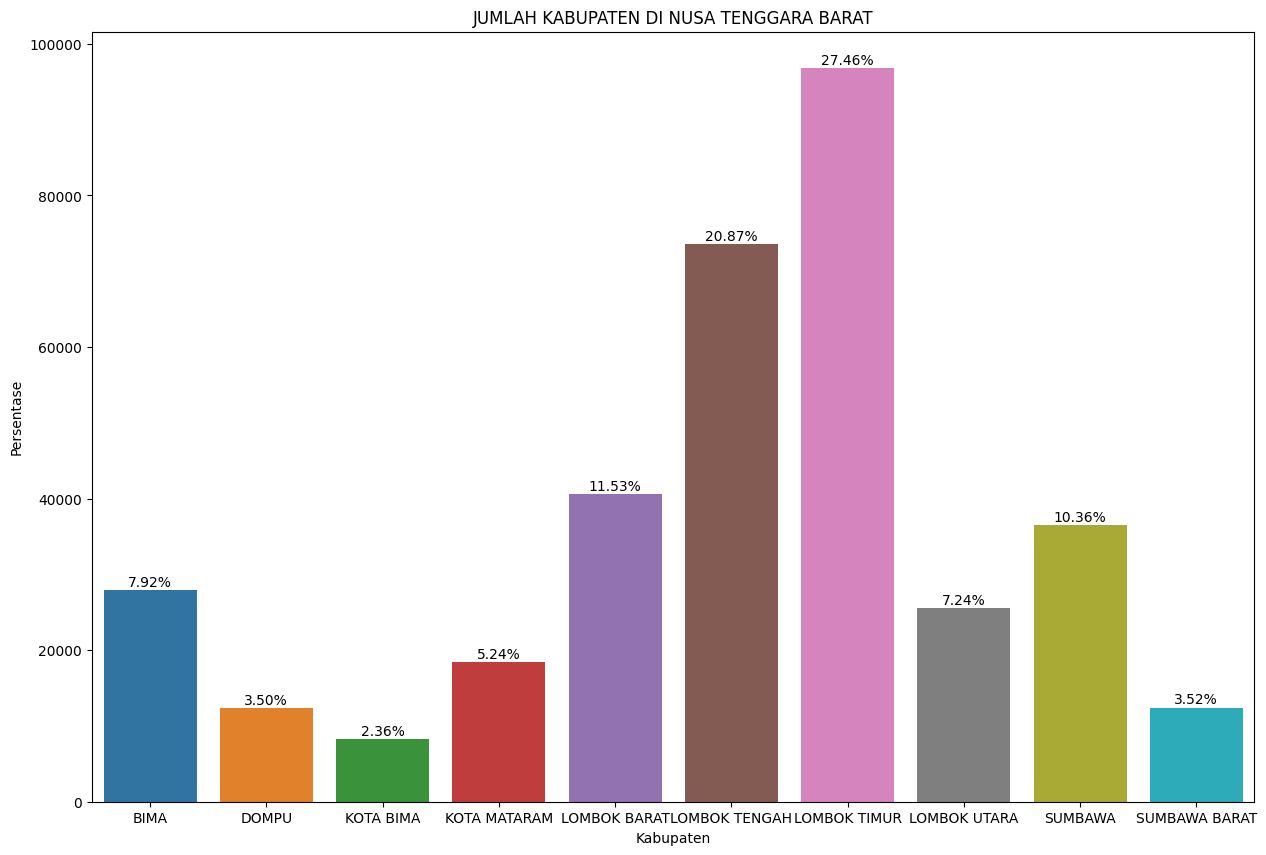

In [39]:
# Hitung jumlah total data
total_data = len(df_clean[df_clean['nama provinsi'] == 'NUSA TENGGARA BARAT'])

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_clean[df_clean['nama provinsi'] == 'NUSA TENGGARA BARAT'], x='nama kabupaten')
plt.title('JUMLAH KABUPATEN DI NUSA TENGGARA BARAT')
plt.xlabel('Kabupaten')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 500,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=10)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

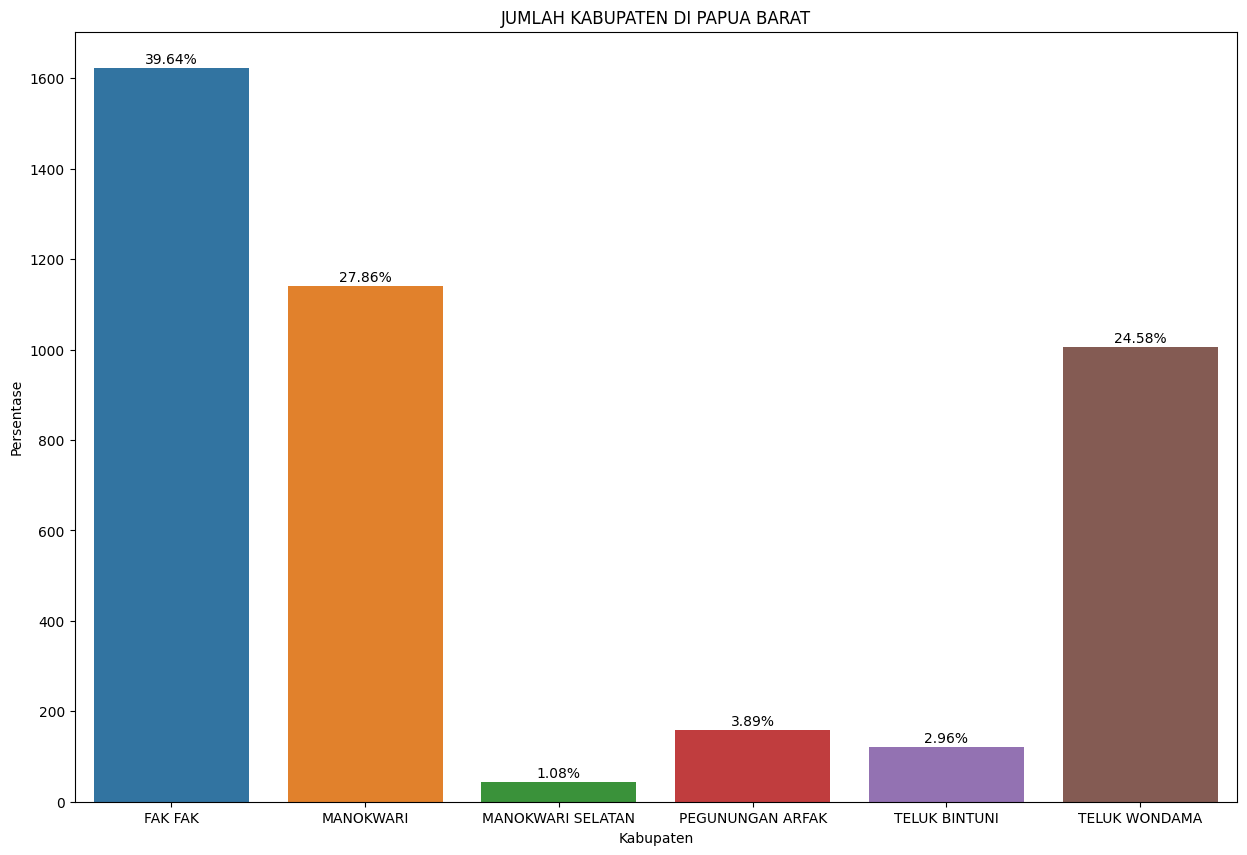

In [40]:
# Hitung jumlah total data
total_data = len(df_clean[df_clean['nama provinsi'] == 'PAPUA BARAT'])

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_clean[df_clean['nama provinsi'] == 'PAPUA BARAT'], x='nama kabupaten')
plt.title('JUMLAH KABUPATEN DI PAPUA BARAT')
plt.xlabel('Kabupaten')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 10,
            s="{:.2f}%".format(height/total_data*100),
            ha='center')

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=10)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680316 entries, 0 to 2702999
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   product_id        float64       
 1   gross_amount      float64       
 2   discounts         float64       
 3   transaction_date  datetime64[ns]
 4   product name      object        
 5   user_id           object        
 6   full_name         object        
 7   gender            object        
 8   money_spent       float64       
 9   refund            float64       
 10  wallet_balance    float64       
 11  join_date         object        
 12  birth             object        
 13  nama provinsi     object        
 14  kode provinsi     int64         
 15  nama kabupaten    object        
 16  kode kabupaten    int64         
 17  nama kecamatan    object        
 18  kode kecamatan    int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(9)
memory usage: 409.0+ MB


In [42]:
from datetime import datetime

df_clean['join_date'] = pd.to_datetime(df_clean['join_date'])
df_clean['birth'] = pd.to_datetime(df_clean['birth'])

def calculate_age(birth_date):
    today = datetime.now()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Hitung umur
df_clean['usia'] = df_clean['birth'].apply(calculate_age)
df_clean

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan,usia
0,1,519700,0,2024-05-19,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000,0,750000,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605,28
1,1,185000,0,2024-01-06,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000,0,750000,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605,28
2,1,488400,248200,2024-02-03,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000,0,750000,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605,28
3,1,706900,551800,2024-07-01,Man Fashion,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000,0,750000,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605,28
4,14,128500,0,2024-11-04,Kesehatan,SC3526052001006,Ir. SENJAYAWATI S.Sos.,perempuan,2220000,0,750000,2023-12-08,1996-01-26,JAWA TIMUR,35,BANGKALAN,3526,AROSBAYA,352605,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702995,16,1000,0,2024-01-11,Sewa Motor/Mobil,SC3578251002034,USWATUN UMMAMI,perempuan,0,0,0,2024-09-27,1997-05-12,JAWA TIMUR,35,KOTA SURABAYA,3578,GUNUNG ANYAR,357825,26
2702996,16,2100,0,2024-01-04,Sewa Motor/Mobil,SC3520142007921,EGA,laki-laki,0,0,2910000,2024-02-18,1982-12-05,JAWA TIMUR,35,MAGETAN,3520,KARAS,352014,41
2702997,16,7900,0,2024-10-05,Sewa Motor/Mobil,SC3520142007921,EGA,laki-laki,0,0,2910000,2024-02-18,1982-12-05,JAWA TIMUR,35,MAGETAN,3520,KARAS,352014,41
2702998,16,2900,0,2024-10-09,Sewa Motor/Mobil,SC3507162001003,NURRACHADIANA NAZIFAH,perempuan,0,0,0,2024-09-12,1996-06-24,JAWA TIMUR,35,MALANG,3507,TUMPANG,350716,27


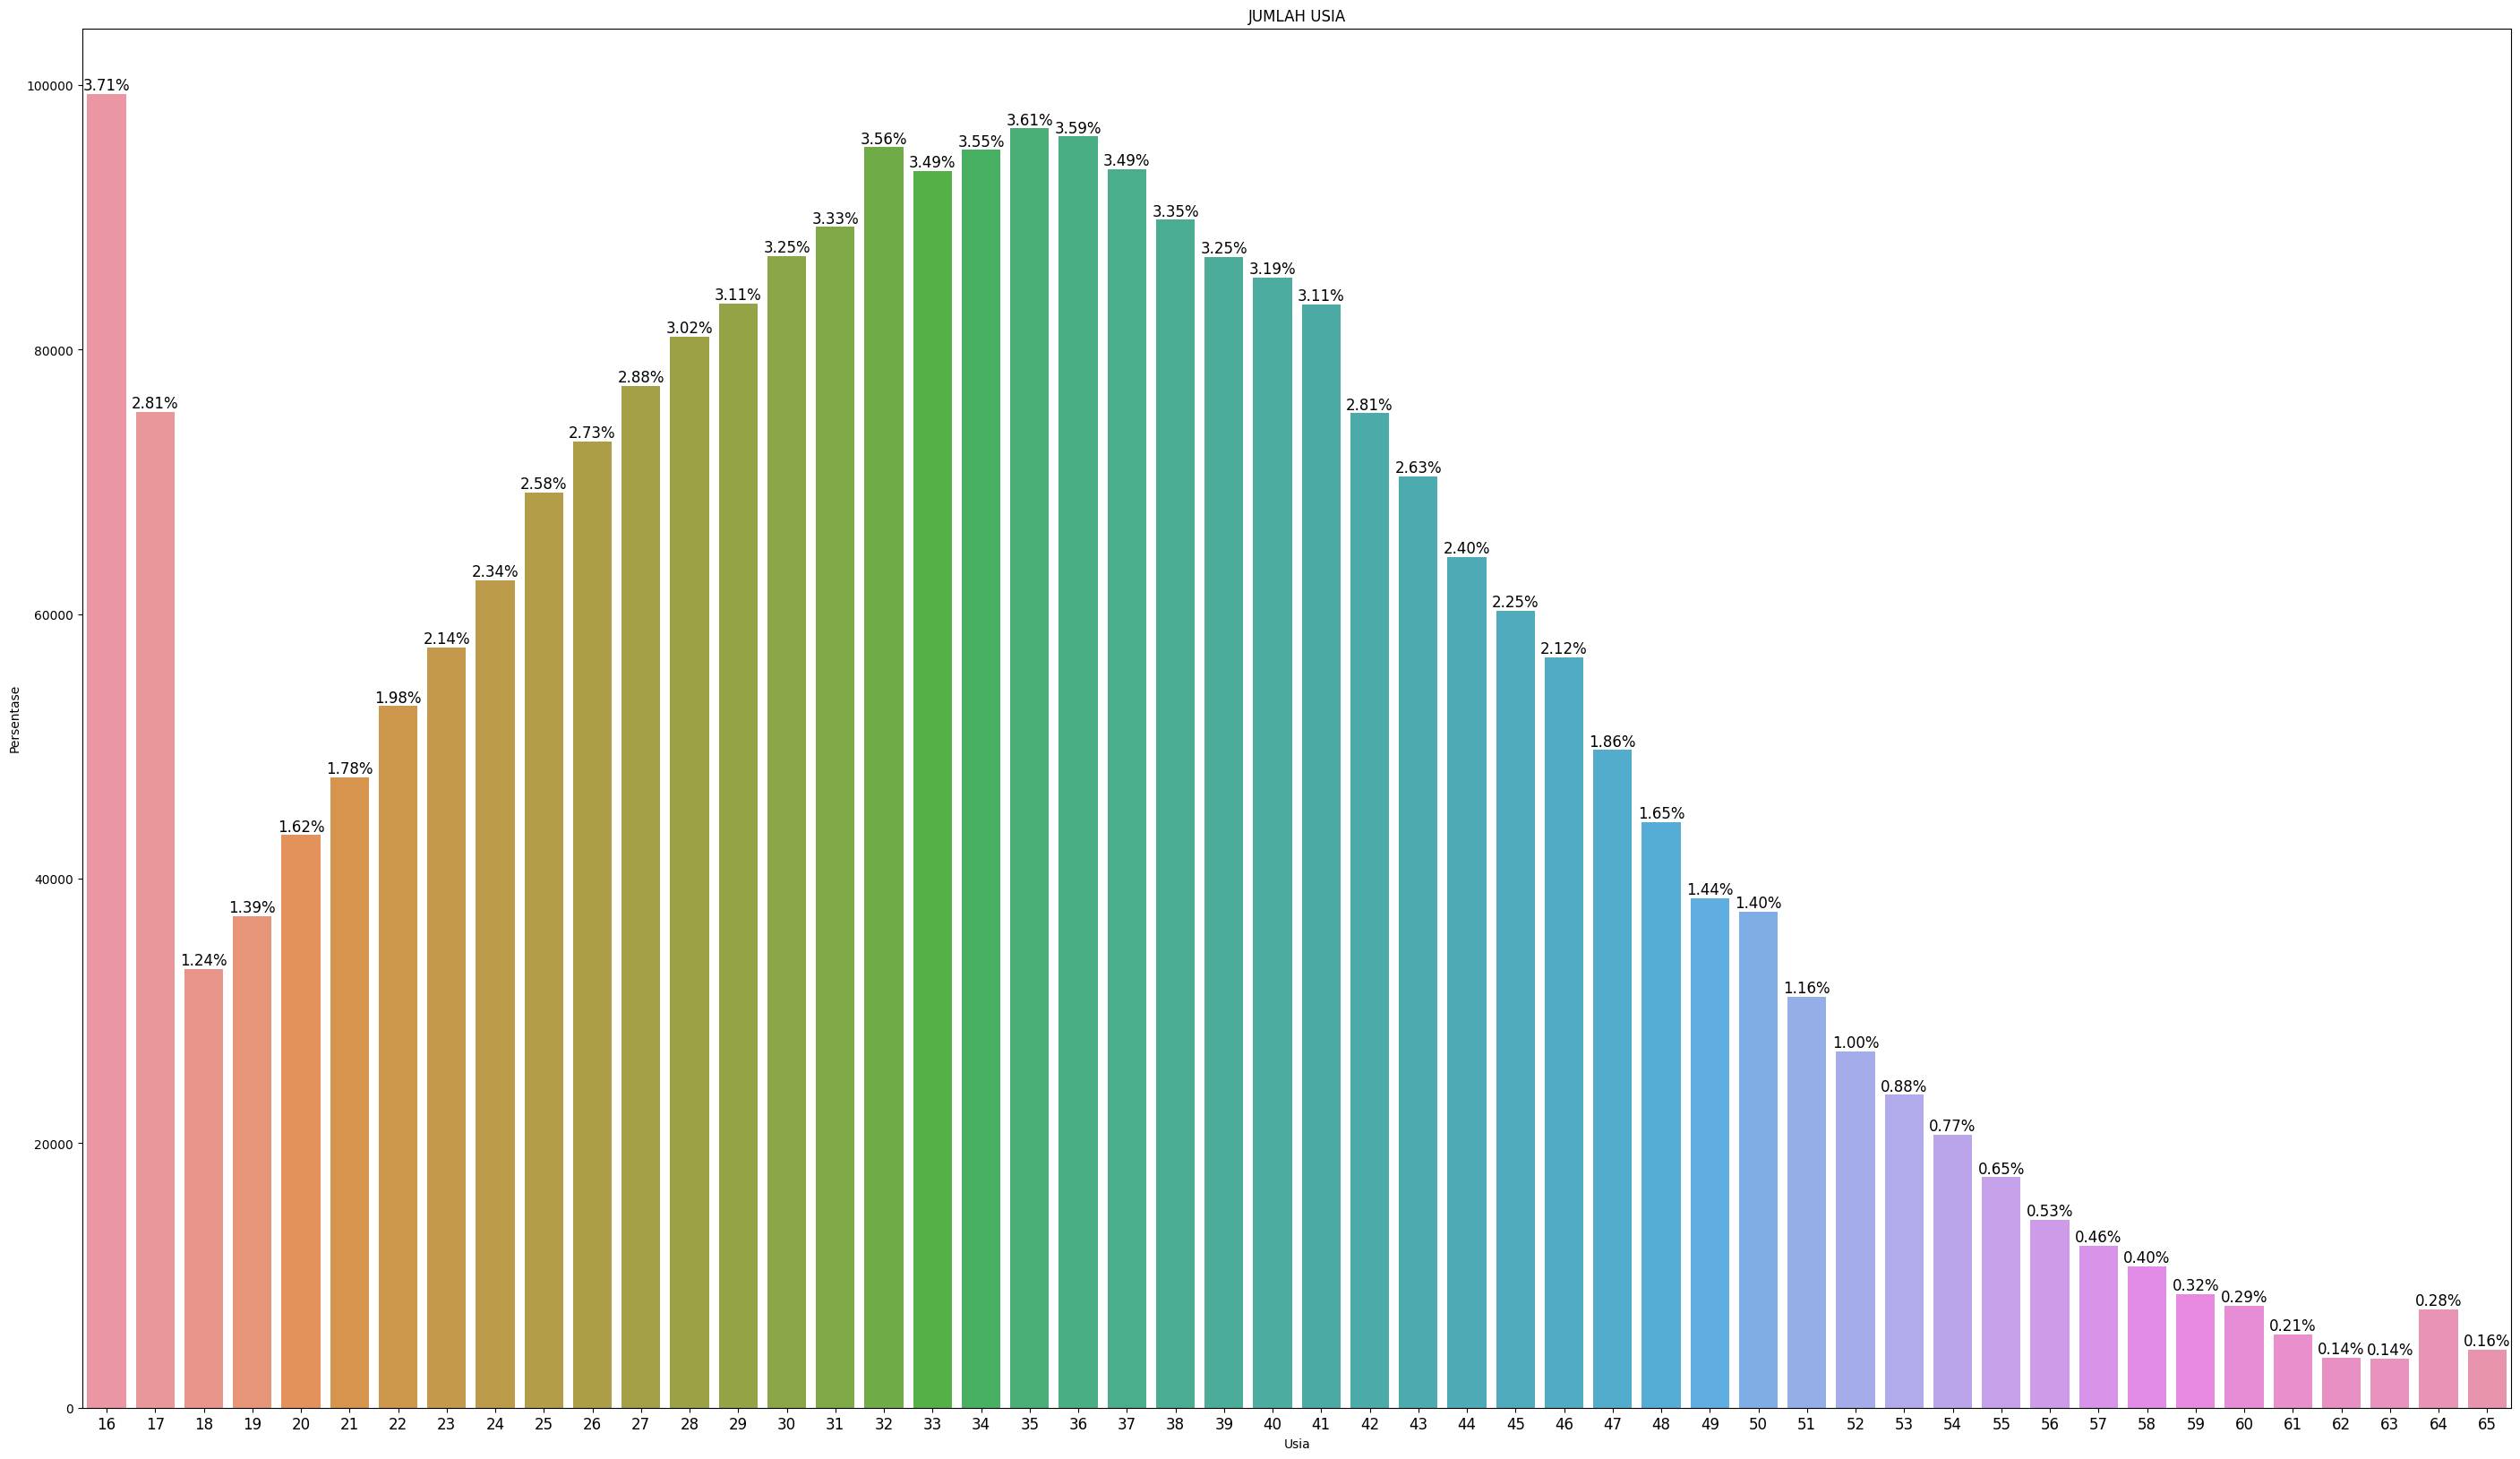

In [43]:
# Hitung jumlah total data
total_data = len(df_clean)

# Visualisasi jumlah kemunculan nama produk
plt.figure(figsize=(35, 20))
ax = sns.countplot(data=df_clean, x='usia')
plt.title('JUMLAH USIA')
plt.xlabel('Usia')
plt.ylabel('Persentase')

# Menambahkan nilai di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 300,
            s="{:.2f}%".format(height/total_data*100),
            ha='center', fontsize=12)

# Memperkecil ukuran font untuk nama produk
ax.tick_params(axis='x', labelsize=12)

# Mengatur label sumbu x agar dibungkus (wrap text)
# plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

#### Bivariate Analysis

In [44]:
df_clean['profit'] = df_clean['gross_amount'] - df_clean['discounts']
df_clean['profit'] = df_clean['profit'].apply(lambda x: 0 if (x < 0) & (x > -1) else x)

In [45]:
# Hitung profit cowok dan profit cewe
profit_cowok = df_clean[df_clean['gender'] == "laki-laki"]['profit'].sum()
profit_cewe = df_clean[df_clean['gender'] == "perempuan"]['profit'].sum()

# Tampilkan profit cowok dan profit cewe
print("Profit Cowok:", profit_cowok)
print("Profit Cewe:", profit_cewe)

Profit Cowok: 32720767000.0
Profit Cewe: 96690539000.0


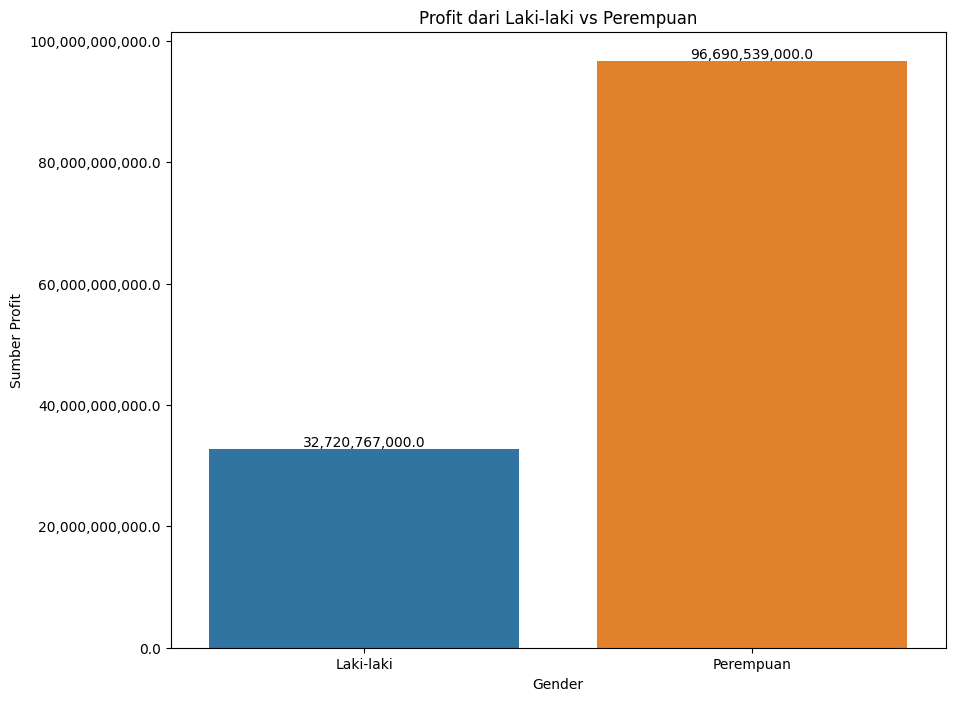

In [53]:
import matplotlib.ticker as ticker

# Set format tampilan angka dengan pemisah ribuan
pd.options.display.float_format = '{:,.0f}'.format

# Hitung profit cowok dan profit cewe
profit_cowok = df_clean[df_clean['gender'] == "laki-laki"]['profit'].sum()
profit_cewe = df_clean[df_clean['gender'] == "perempuan"]['profit'].sum()

# Visualisasi profit cowok dan cewe
plt.figure(figsize=(10, 8))
sns.barplot(x=['Laki-laki', 'Perempuan'], y=[profit_cowok, profit_cewe])

# Menambahkan nilai dengan format ribuan
for index, value in enumerate([profit_cowok, profit_cewe]):
    plt.text(index, value, format(value, ','), ha='center', va='bottom')

# Menyesuaikan format label sumbu y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(x, ',')))

plt.title('Profit dari Laki-laki vs Perempuan')
plt.ylabel('Sumber Profit')
plt.xlabel('Gender')

plt.show()

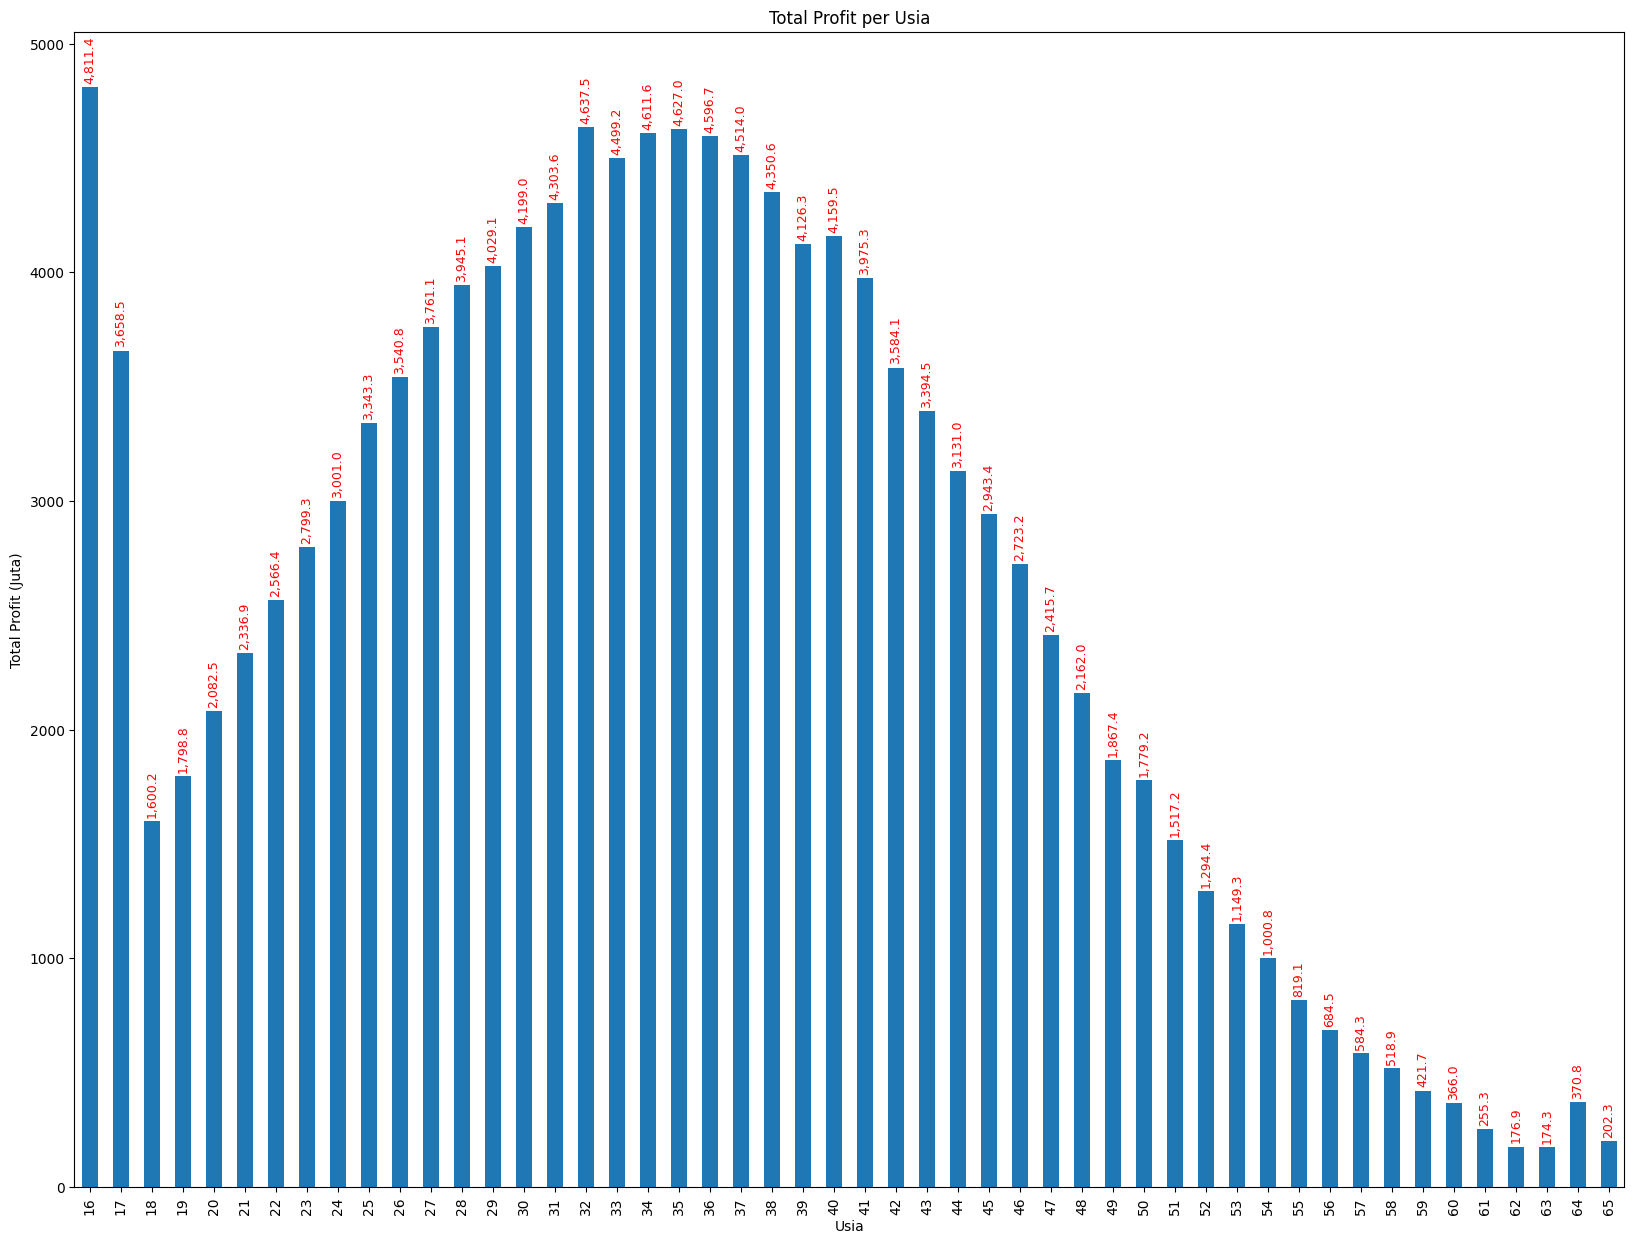

In [47]:
import matplotlib.pyplot as plt

# Menghitung total profit berdasarkan usia
total_profit_per_usia = df_clean.groupby('usia')['profit'].sum()

# Konversi nilai ke jutaan
total_profit_per_usia_million = total_profit_per_usia / 1000000

# Menampilkan dalam barplot
plt.figure(figsize=(20, 15))

total_profit_per_usia_million.plot(kind='bar')

for index, value in enumerate(total_profit_per_usia_million):
    formatted_value = '{:,.1f}'.format(value)  # Format nilai dengan penanda ribuan
    plt.text(index, value + 15, formatted_value, ha='center', va='bottom', fontsize=9, rotation=90, color="red")  # Menambahkan 3 sebagai jarak antara nilai dan bar

plt.title('Total Profit per Usia')
plt.xlabel('Usia')
plt.ylabel('Total Profit (Juta)')  # Menambahkan label "Juta" di sumbu y

plt.show()


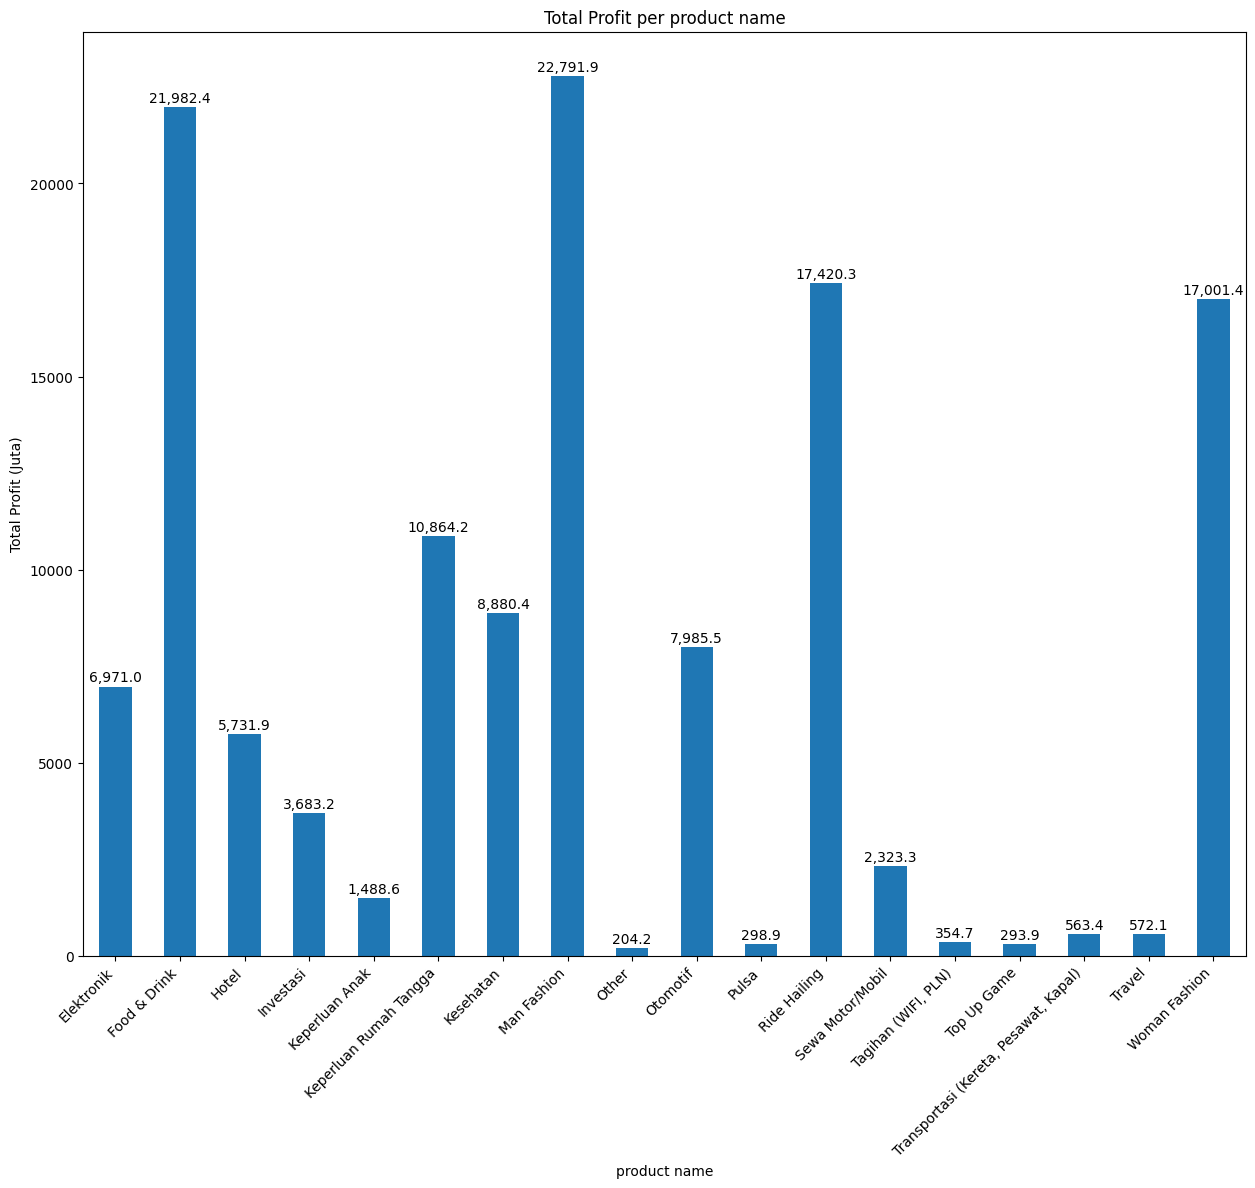

In [48]:
# Menghitung total profit berdasarkan product name
total_profit_per_product_name = df_clean.groupby('product name')['profit'].sum()

# Konversi _ilai ke jutaan
total_profit_per_product_name_million = total_profit_per_product_name / 1000000

# Menampilkan dalam barplot
plt.figure(figsize=(15, 12))

total_profit_per_product_name_million.plot(kind='bar')

for index, value in enumerate(total_profit_per_product_name_million):
    formatted_value = '{:,.1f}'.format(value)  # Format nilai dengan penanda ribuan
    plt.text(index, value + 45, formatted_value, ha='center', va='bottom', fontsize=10)

plt.title('Total Profit per product name')
plt.xlabel('product name')
plt.ylabel('Total Profit (Juta)')  # Menambahkan label "Juta" di sumbu y
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()


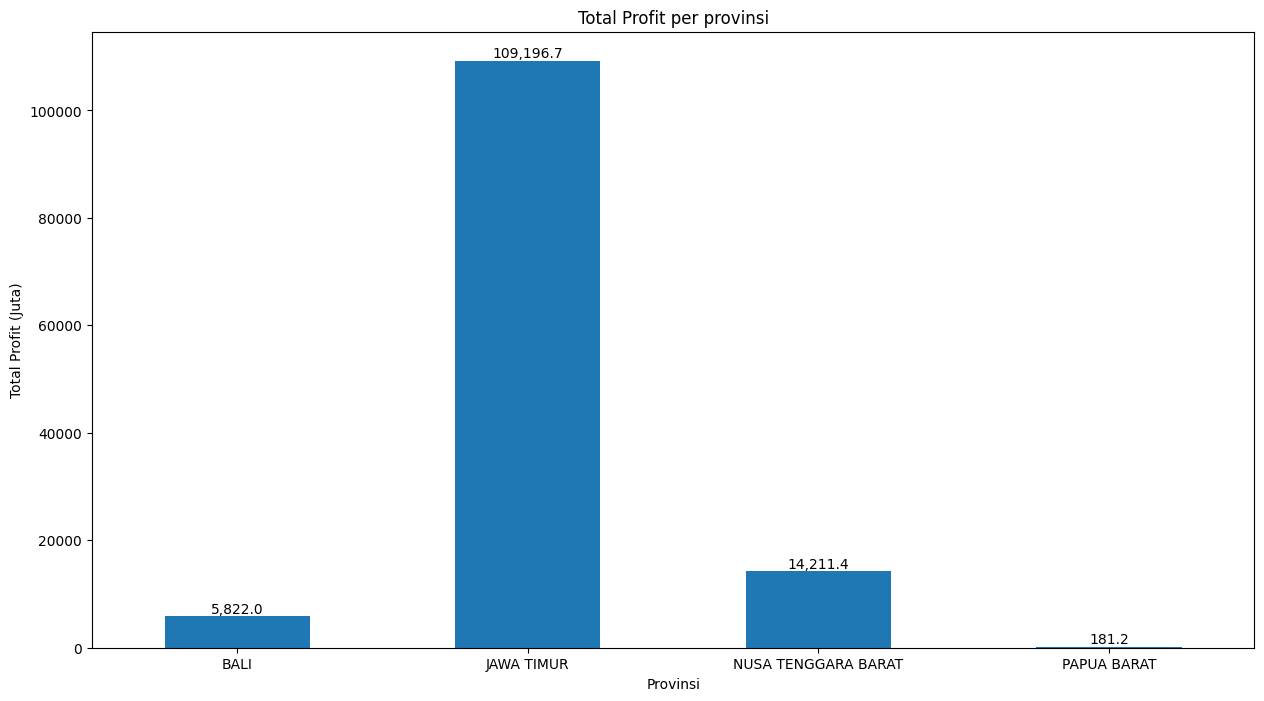

In [49]:
# Menghitung total profit berdasarkan Provinsi
total_profit_per_provinsi = df_clean.groupby('nama provinsi')['profit'].sum()

# Konversi _ilai ke jutaan
total_profit_per_provinsi_million = total_profit_per_provinsi / 1000000

# Menampilkan dalam barplot
plt.figure(figsize=(15, 8))

total_profit_per_provinsi_million.plot(kind='bar')

for index, value in enumerate(total_profit_per_provinsi_million):
    formatted_value = '{:,.1f}'.format(value)  # Format nilai dengan penanda ribuan
    plt.text(index, value + 45, formatted_value, ha='center', va='bottom', fontsize=10)

plt.title('Total Profit per provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Profit (Juta)')  # Menambahkan label "Juta" di sumbu y
plt.xticks(rotation=0, ha='center', fontsize=10)

plt.show()


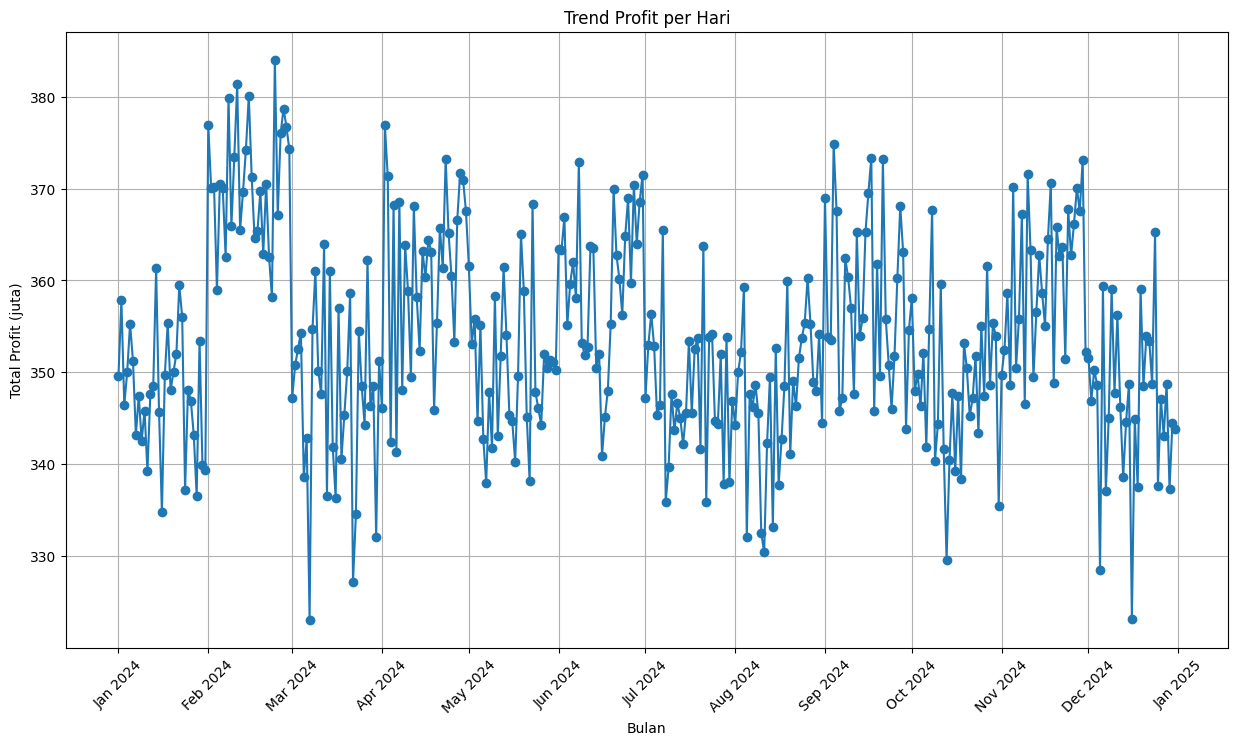

In [50]:
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Kelompokkan data berdasarkan 'transaction_date' dan hitung total profit per hari
daily_profit = df_clean.groupby(df_clean['transaction_date'].dt.date)['profit'].sum()

# Buat plot time series
plt.figure(figsize=(15, 8))
plt.plot(daily_profit.index, daily_profit.values, marker='o', linestyle='-')
plt.title('Trend Profit per Hari')
plt.xlabel('Bulan')
plt.ylabel('Total Profit (juta)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))) 

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

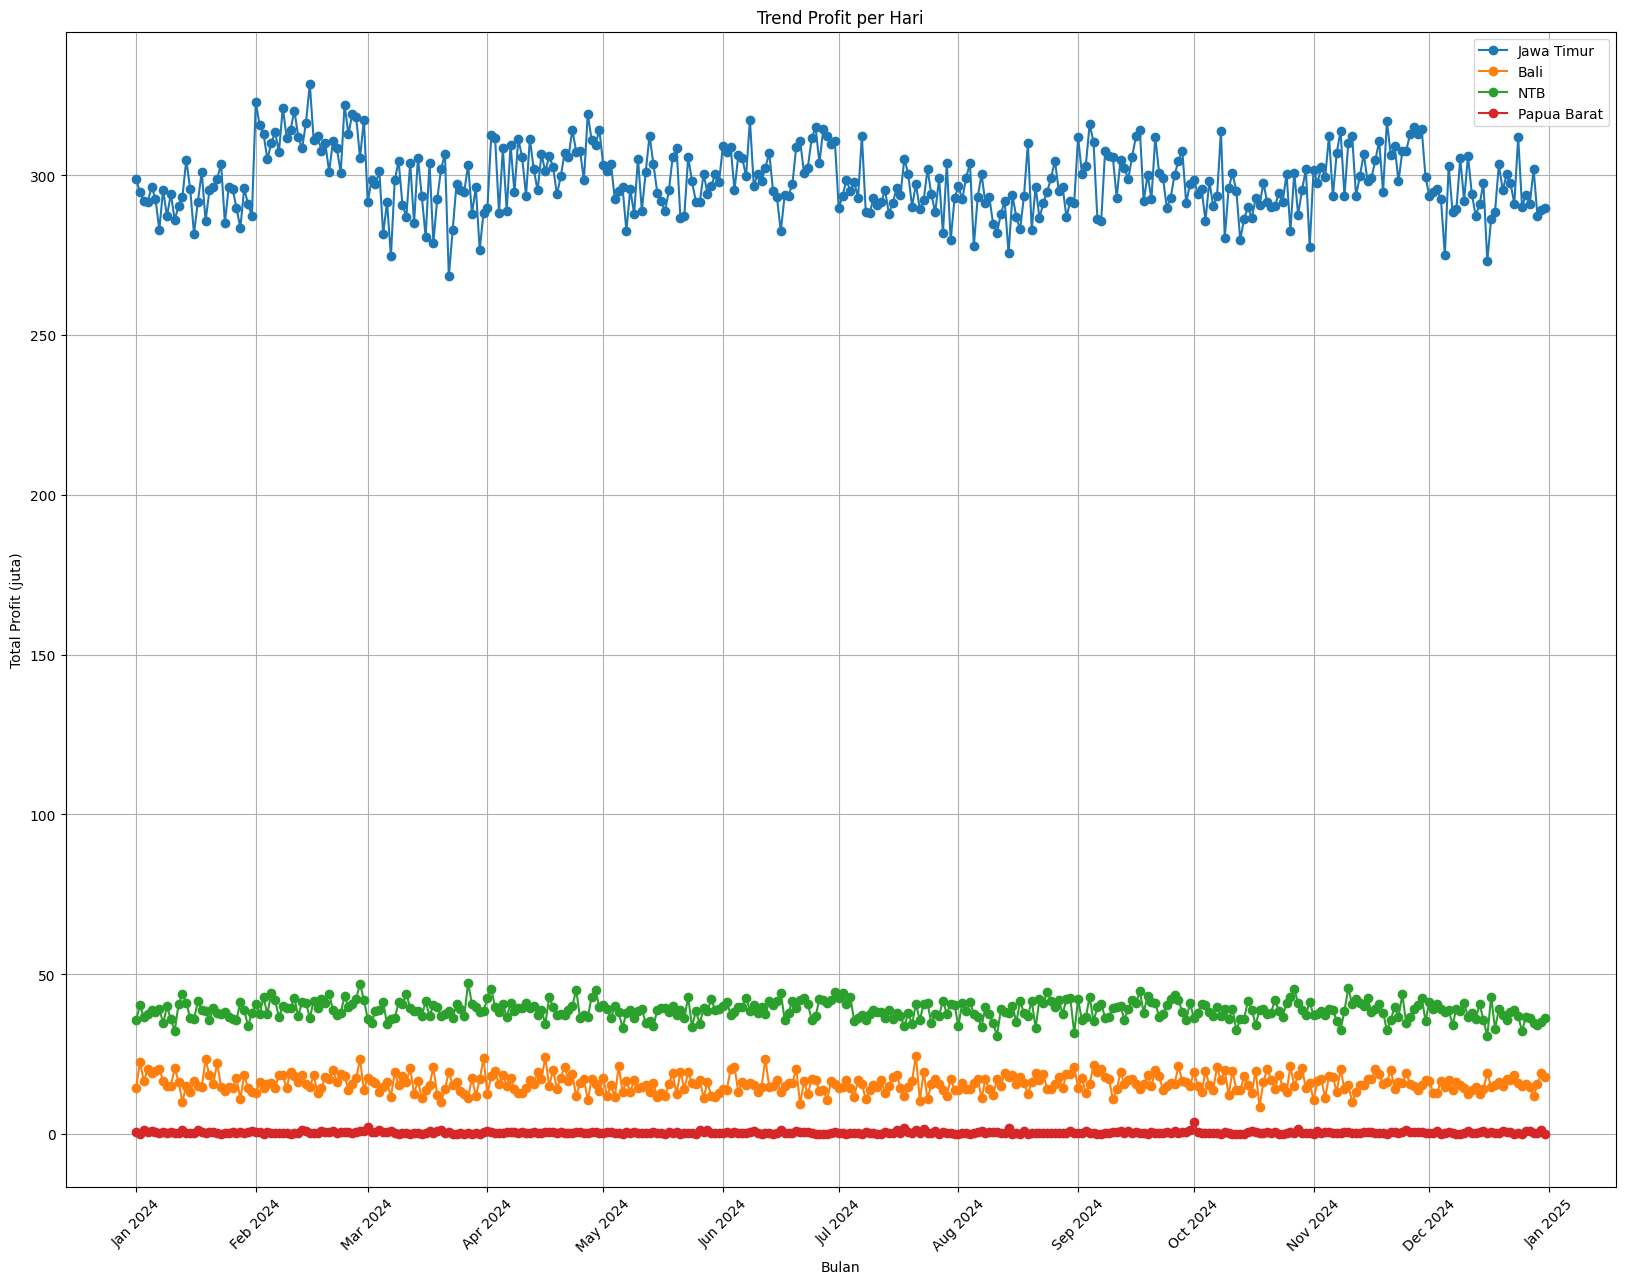

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Kelompokkan data berdasarkan provinsi dan 'transaction_date', lalu hitung total profit per hari
province_daily_profit = df_clean.groupby(['nama provinsi', df_clean['transaction_date'].dt.date])['profit'].sum()

# Filter data untuk setiap provinsi
jawa_timur_daily_profit = province_daily_profit['JAWA TIMUR']
bali_daily_profit = province_daily_profit['BALI']
ntb_daily_profit = province_daily_profit['NUSA TENGGARA BARAT']
papua_barat_daily_profit = province_daily_profit['PAPUA BARAT']

# Buat plot time series untuk masing-masing provinsi
plt.figure(figsize=(20, 15))

plt.plot(jawa_timur_daily_profit.index, jawa_timur_daily_profit.values, label='Jawa Timur', marker='o', linestyle='-')
plt.plot(bali_daily_profit.index, bali_daily_profit.values, label='Bali', marker='o', linestyle='-')
plt.plot(ntb_daily_profit.index, ntb_daily_profit.values, label='NTB', marker='o', linestyle='-')
plt.plot(papua_barat_daily_profit.index, papua_barat_daily_profit.values, label='Papua Barat', marker='o', linestyle='-')

plt.title('Trend Profit per Hari')
plt.xlabel('Bulan')
plt.ylabel('Total Profit (juta)')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))) 

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [54]:
df_clean[df_clean['profit']<0]

,product_id,gross_amount,discounts,transaction_date,product name,user_id,full_name,gender,money_spent,refund,...,join_date,birth,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan,usia,profit


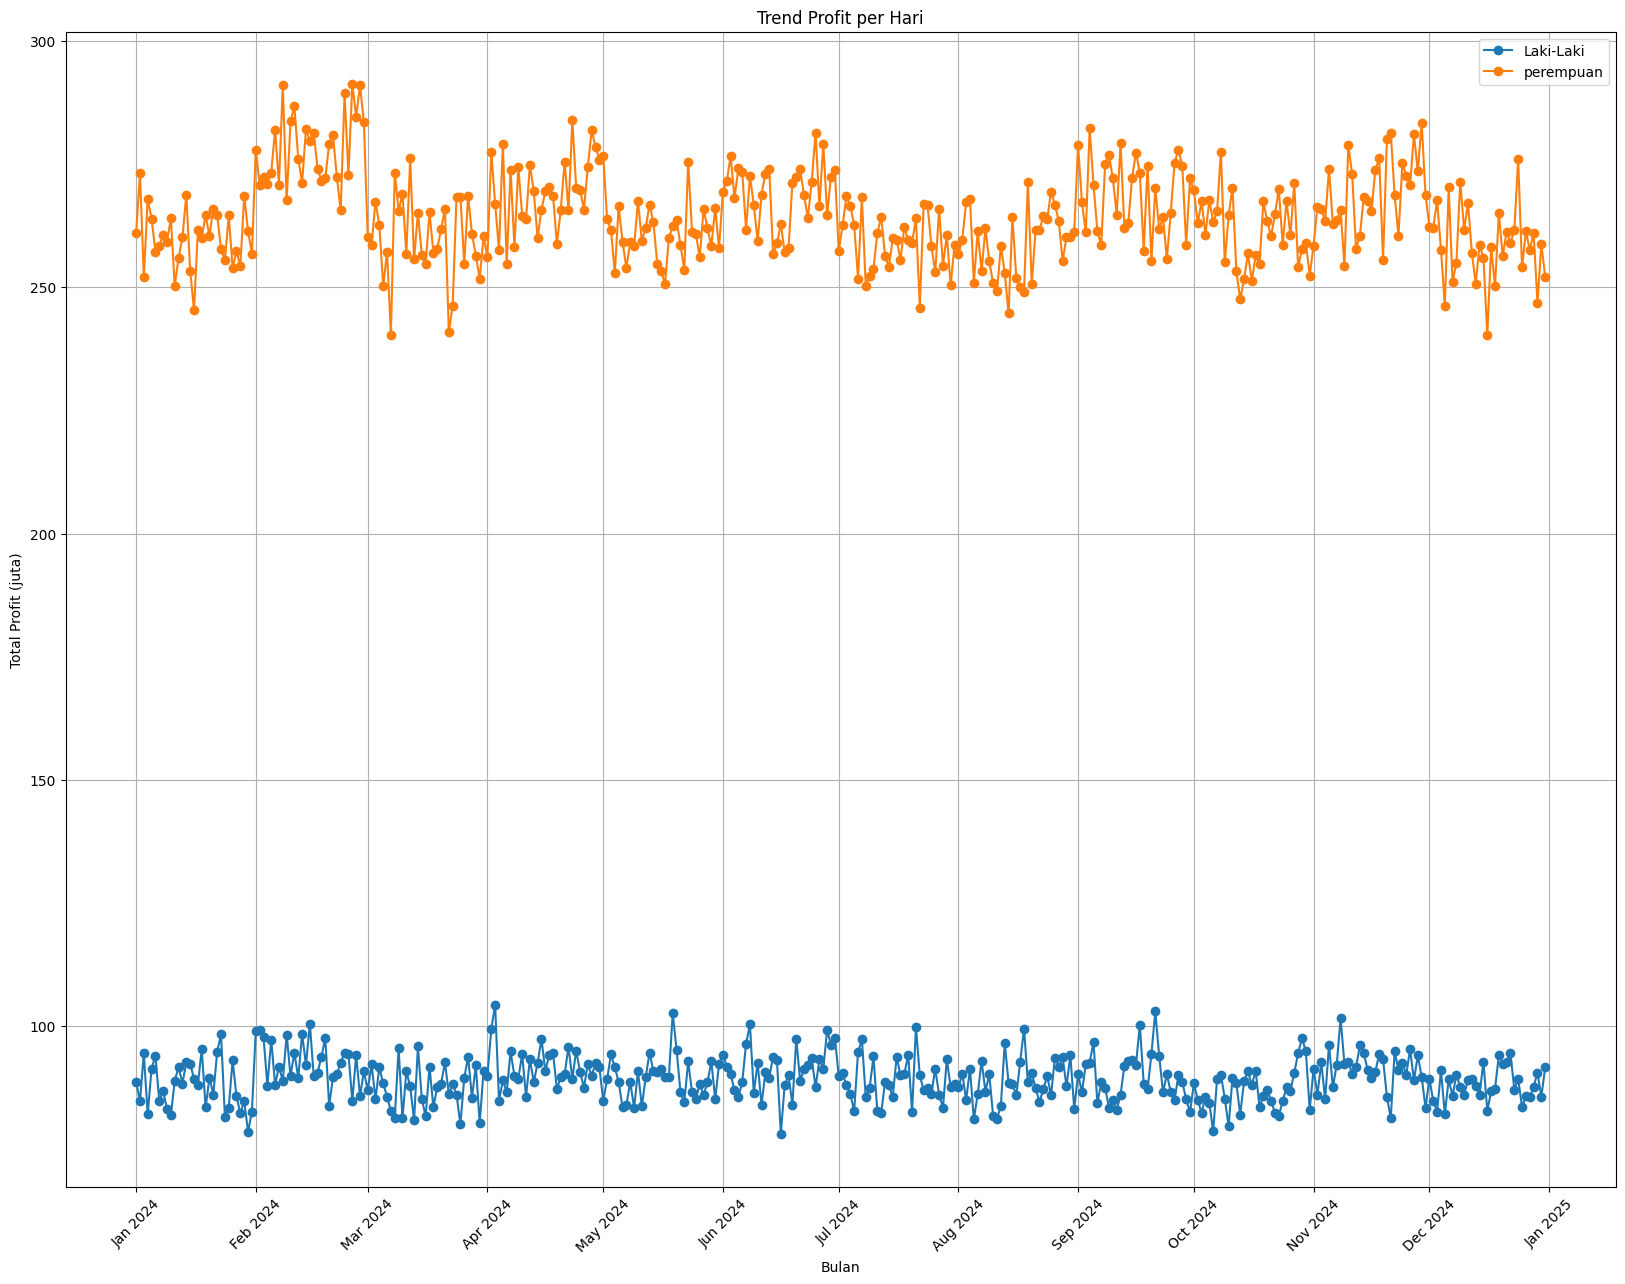

In [55]:
# Kelompokkan data berdasarkan provinsi dan 'transaction_date', lalu hitung total profit per hari
gender_daily_profit = df_clean.groupby(['gender', df_clean['transaction_date'].dt.date])['profit'].sum()

# Filter data untuk setiap provinsi
laki_laki_daily_profit = gender_daily_profit['laki-laki']
perempuan_daily_profit = gender_daily_profit['perempuan']

# Buat plot time series untuk masing-masing provinsi
plt.figure(figsize=(20, 15))

plt.plot(laki_laki_daily_profit.index, laki_laki_daily_profit.values, label='Laki-Laki', marker='o', linestyle='-')
plt.plot(perempuan_daily_profit.index, perempuan_daily_profit.values, label='perempuan', marker='o', linestyle='-')

plt.title('Trend Profit per Hari')
plt.xlabel('Bulan')
plt.ylabel('Total Profit (juta)')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))) 

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Data Preparation for Recommender System

In [1]:
# missing value

df_clean.isna().sum()

NameError: name 'df_clean' is not defined

In [ ]:
items = []
def list_item(data):
    if(data['user_id'] == "SC3526052001006"):
        items.append(data['product_id'])

df_clean.apply(list_item, axis=1)

items

In [ ]:
from collections import defaultdict

# Membuat default dictionary untuk menyimpan data untuk setiap unique user ID
user_data = defaultdict(lambda: {"user_id": "", "product_counts": {}})

# Fungsi untuk mengumpulkan data
def collect_data(row):
    user_id = row["user_id"]
    product_id = row["product_id"]

    # Menambahkan produk ke dalam dictionary untuk user_id yang sesuai
    user_data[user_id]["user_id"] = user_id
    user_data[user_id]["product_counts"][product_id] = user_data[user_id]["product_counts"].get(product_id, 0) + 1

# Menggunakan apply untuk menerapkan fungsi collect_data ke setiap baris dalam DataFrame
df_clean.apply(collect_data, axis=1)

# Mengonversi defaultdict ke dalam list
user_data_list = list(user_data.values())

user_data_df = pd.DataFrame(user_data_list)
user_data_df

In [ ]:
user_data_df['product_counts'][0].get(1.0)

In [ ]:
user_data_df['product_counts'][0].keys()

In [ ]:
#  CODE MASIH SALAH






user_data_list = list(user_data.values())

# Membuat DataFrame dari user_data_list
user_data_df = pd.DataFrame(user_data_list)

# Membuat kolom baru untuk setiap ID produk
for i in range(1, 19):
    user_data_df[f"product_{i}_count"] = user_data_df["product_counts"].apply(lambda x: x.get(str(i), 0))

# Menghapus kolom 'product_counts' yang tidak lagi diperlukan
user_data_df.drop(columns=["product_counts"], inplace=True)

# Menampilkan DataFrame yang sudah disesuaikan
print(user_data_df)